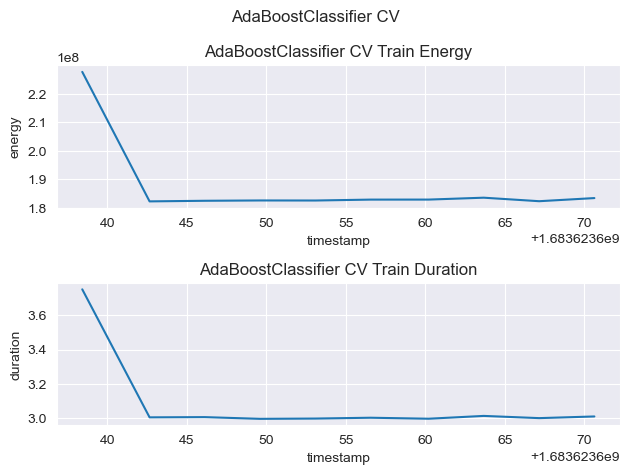

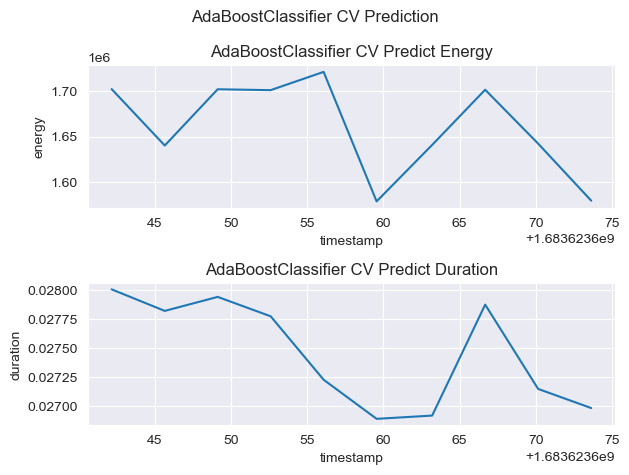

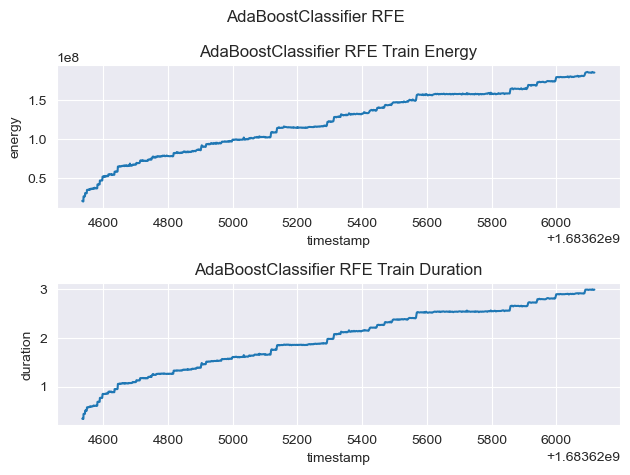

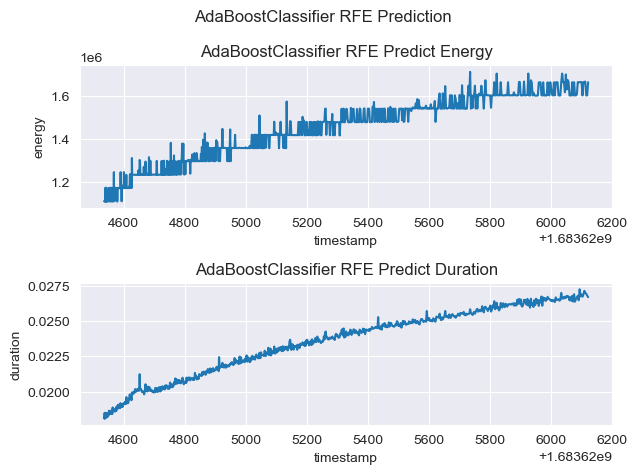

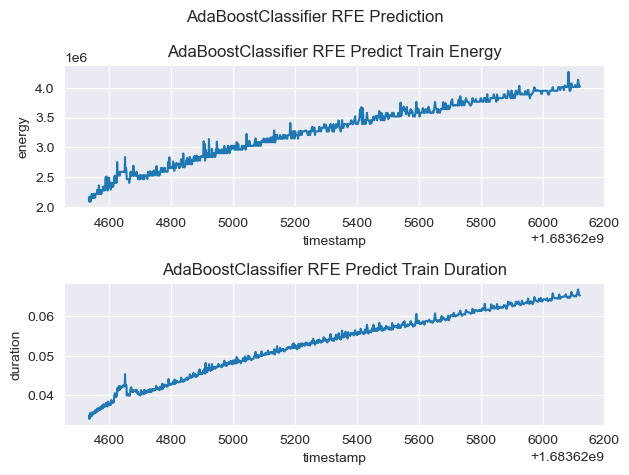

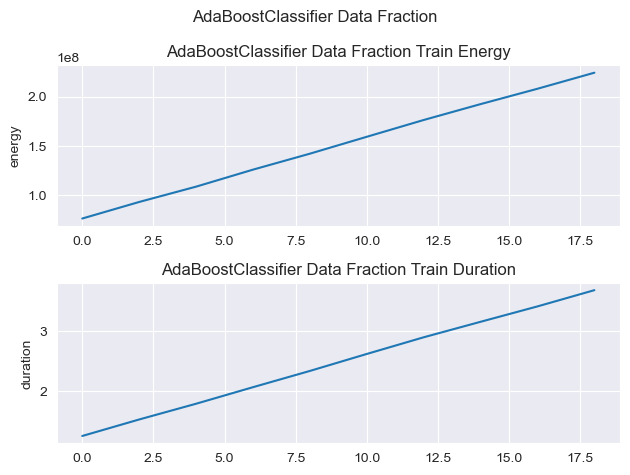

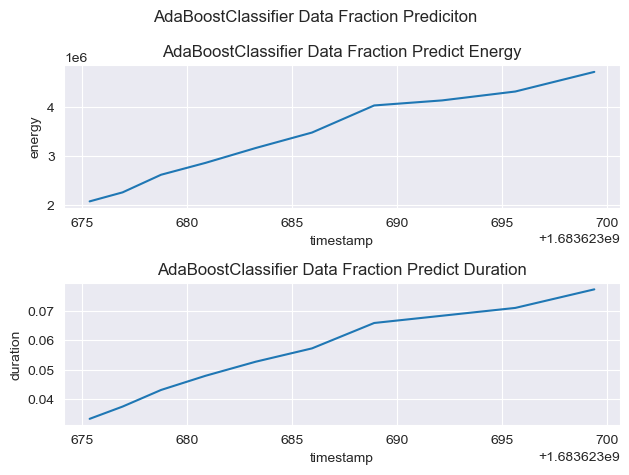

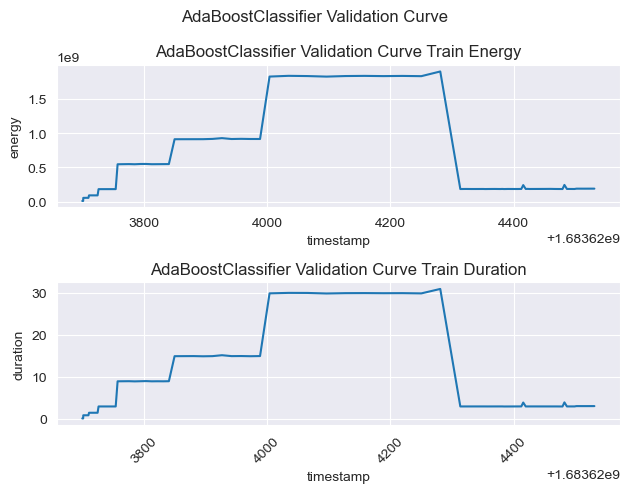

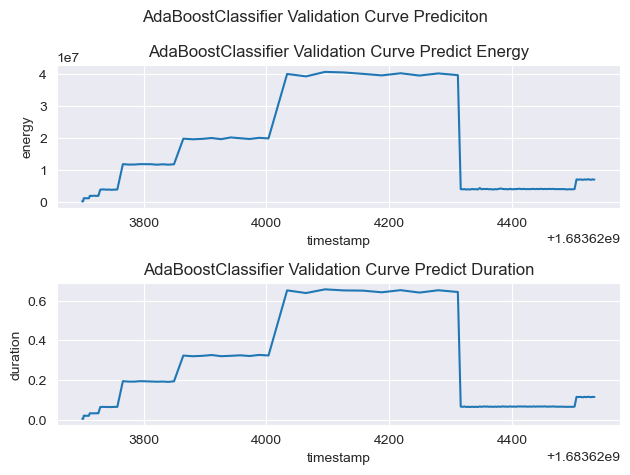

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_power_measurements(
        model,
        exp_id,
        core_directory='/Users/Gabriel/Dropbox/Research/Serrano/Experiments/Results/Energy'
):
    #
    model_dir = os.path.join(core_directory, exp_id+"/models")
# 'Model_AdaBoostClassifier_ada_exp_iteration_0_cv_power_report.csv'
    # Plot CV
    df_cv = pd.read_csv(os.path.join(model_dir, 'Model_'+model+'_'+exp_id+'_iteration_0_cv_power_report.csv'), index_col='timestamp')
    df_cv_train = df_cv[df_cv['tag'].str.contains('train')]
    df_cv_predict = df_cv[df_cv['tag'].str.contains('predict')]

    fig_cv, axes_cv = plt.subplots(2)
    # sns.lineplot(data=df_cv_train, x='timestamp', y='energy').set(title=f'{model} CV Train Energy', ax = axes_cv[0])
    # sns.lineplot(data=df_cv_train, x='timestamp', y='duration').set(title=f'{model} CV Train Duration', ax = axes_cv[1])
    sns.lineplot(data=df_cv_train, x='timestamp', y='energy', ax = axes_cv[0])
    sns.lineplot(data=df_cv_train, x='timestamp', y='duration', ax = axes_cv[1])
    axes_cv[0].set_title(f'{model} CV Train Energy')
    axes_cv[1].set_title(f'{model} CV Train Duration')
    plt.suptitle(f'{model} CV')
    fig_cv.tight_layout()
    plt.show()

    fig_cv_pred, axes_cv_pred = plt.subplots(2)
    sns.lineplot(data=df_cv_predict, x='timestamp', y='energy', ax = axes_cv_pred[0])
    sns.lineplot(data=df_cv_predict, x='timestamp', y='duration', ax = axes_cv_pred[1])
    axes_cv_pred[0].set_title(f'{model} CV Predict Energy')
    axes_cv_pred[1].set_title(f'{model} CV Predict Duration')
    plt.suptitle(f'{model} CV Prediction')
    fig_cv_pred.tight_layout()
    plt.show()

    try:
        # Plot RFE
        df_rfe = pd.read_csv(os.path.join(model_dir, 'Model_'+model+'_'+exp_id+'_rfe_power_report.csv'), index_col='timestamp')

        df_rfe_train = df_rfe[df_rfe['tag'].str.contains(f'{model}_train')]
        df_rfe_predict = df_rfe[df_rfe['tag'].str.contains(f'predict_test')]
        df_rfe_predict_train = df_rfe[df_rfe['tag'].str.contains(f'predict_train')]

        fig_rfe, axes_rfe = plt.subplots(2)
        # Filtering negative values
        sns.lineplot(data=df_rfe_train[~(df_rfe_train['energy'] < 0)], x='timestamp', y='energy', ax=axes_rfe[0])
        sns.lineplot(data=df_rfe_train[~(df_rfe_train['energy'] < 0)], x='timestamp', y='duration', ax=axes_rfe[1])
        axes_rfe[0].set_title(f'{model} RFE Train Energy')
        axes_rfe[1].set_title(f'{model} RFE Train Duration')
        plt.suptitle(f'{model} RFE')
        fig_rfe.tight_layout()
        plt.show()

        fig_rfe_pred, axes_rfe_pred = plt.subplots(2)
        sns.lineplot(data=df_rfe_predict[~(df_rfe_predict['energy'] < 0)], x='timestamp', y='energy', ax=axes_rfe_pred[0])
        sns.lineplot(data=df_rfe_predict[~(df_rfe_predict['energy'] < 0)], x='timestamp', y='duration', ax=axes_rfe_pred[1])
        axes_rfe_pred[0].set_title(f'{model} RFE Predict Energy')
        axes_rfe_pred[1].set_title(f'{model} RFE Predict Duration')
        plt.suptitle(f'{model} RFE Prediction')
        fig_rfe_pred.tight_layout()
        plt.show()

        fig_rfe_pred_train, axes_rfe_pred_train = plt.subplots(2)
        sns.lineplot(data=df_rfe_predict_train[~(df_rfe_predict_train['energy'] < 0)], x='timestamp', y='energy', ax=axes_rfe_pred_train[0])
        sns.lineplot(data=df_rfe_predict_train[~(df_rfe_predict_train['energy'] < 0)], x='timestamp', y='duration', ax=axes_rfe_pred_train[1])
        axes_rfe_pred_train[0].set_title(f'{model} RFE Predict Train Energy')
        axes_rfe_pred_train[1].set_title(f'{model} RFE Predict Train Duration')
        plt.suptitle(f'{model} RFE Prediction')
        fig_rfe_pred_train.tight_layout()
        plt.show()
    except:
        print('No RFE data found')
        df_rfe = pd.DataFrame()

    # Plot data fraction
    df_df = pd.read_csv(os.path.join(model_dir, 'Model_'+model+'_'+exp_id+'_datafraction_power_report.csv'), index_col='timestamp')
    df_df.reset_index(inplace=True)
    df_df_train = df_df[df_df['tag'].str.contains(f'{model}_train')]
    df_df_predict = df_df[df_df['tag'].str.contains(f'{model}_predict')]

    fig_df, axes_df = plt.subplots(2)
    # sns.lineplot(data=df_df_train[~(df_df_train['energy'] < 0)], x='timestamp', y='energy', ax=axes_df[0])
    # sns.lineplot(data=df_df_train[~(df_df_train['energy'] < 0)], x='timestamp', y='duration', ax=axes_df[1])
    sns.lineplot(data=df_df_train[~(df_df_train['energy'] < 0)], x=df_df_train[~(df_df_train['energy'] < 0)].index, y='energy', ax=axes_df[0])
    sns.lineplot(data=df_df_train[~(df_df_train['energy'] < 0)], x=df_df_train[~(df_df_train['energy'] < 0)].index, y='duration', ax=axes_df[1])
    axes_df[0].set_title(f'{model} Data Fraction Train Energy')
    axes_df[1].set_title(f'{model} Data Fraction Train Duration')
    plt.suptitle(f'{model} Data Fraction')
    fig_df.tight_layout()
    plt.show()

    fig_df_pred, axes_df_pred = plt.subplots(2)
    sns.lineplot(data=df_df_predict[~(df_df_predict['energy'] < 0)], x='timestamp', y='energy', ax=axes_df_pred[0])
    sns.lineplot(data=df_df_predict[~(df_df_predict['energy'] < 0)], x='timestamp', y='duration', ax=axes_df_pred[1])
    axes_df_pred[0].set_title(f'{model} Data Fraction Predict Energy')
    axes_df_pred[1].set_title(f'{model} Data Fraction Predict Duration')
    plt.suptitle(f'{model} Data Fraction Prediciton')
    fig_df_pred.tight_layout()
    plt.show()

    # Plot validation curve
    df_vc = pd.read_csv(os.path.join(model_dir, 'Model_'+model+'_'+exp_id+'_validation_curves_power_report.csv'), index_col='timestamp')
    df_vc_train = df_vc[df_vc['tag'].str.contains(f'train')]
    df_vc_predict = df_vc[df_vc['tag'].str.contains(f'predict')]

    fig_vc, axes_vc = plt.subplots(2)
    sns.lineplot(data=df_vc_train[~(df_vc_train['energy'] < 0)], x='timestamp', y='energy', ax=axes_vc[0])
    sns.lineplot(data=df_vc_train[~(df_vc_train['energy'] < 0)], x='timestamp', y='duration', ax=axes_vc[1])
    # axes_vc[0].set_xticks([])
    axes_vc[0].set_title(f'{model} Validation Curve Train Energy')
    axes_vc[1].set_title(f'{model} Validation Curve Train Duration')
    plt.suptitle(f'{model} Validation Curve')
    fig_vc.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

    fig_vc_pred, axes_vc_pred = plt.subplots(2)
    sns.lineplot(data=df_vc_predict[~(df_vc_predict['energy'] < 0)], x='timestamp', y='energy', ax=axes_vc_pred[0]).set(title=f'{model} Validation Curve Predict Energy')
    sns.lineplot(data=df_vc_predict[~(df_vc_predict['energy'] < 0)], x='timestamp', y='duration', ax=axes_vc_pred[1]).set(title=f'{model} Validation Curve Predict Duration')
    # axes_vc_pred[0].set_xticks([])
    axes_vc_pred[0].set_title(f'{model} Validation Curve Predict Energy')
    axes_vc_pred[1].set_title(f'{model} Validation Curve Predict Duration')
    plt.suptitle(f'{model} Validation Curve Prediciton')
    fig_vc_pred.tight_layout()
    plt.show()

    return df_cv, df_rfe, df_df, df_vc

ada_cv, ada_rfe, ada_df, ada_vc = plot_power_measurements('AdaBoostClassifier', 'ada_exp_10')


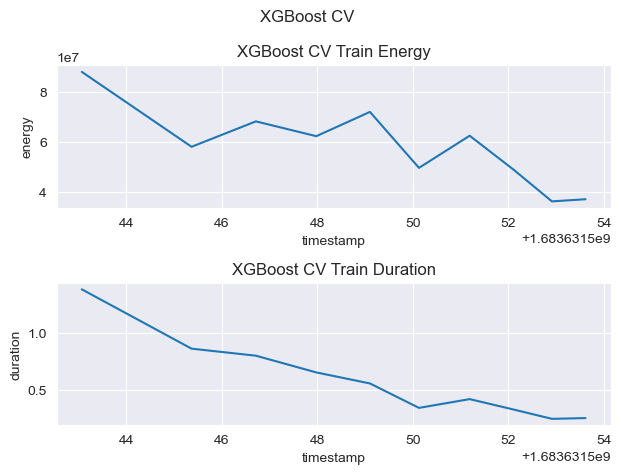

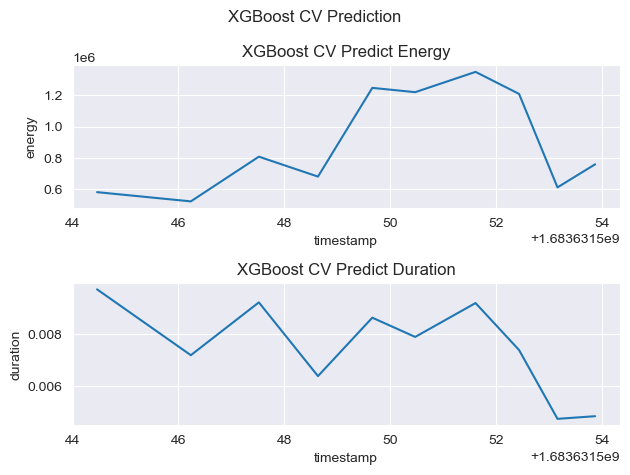

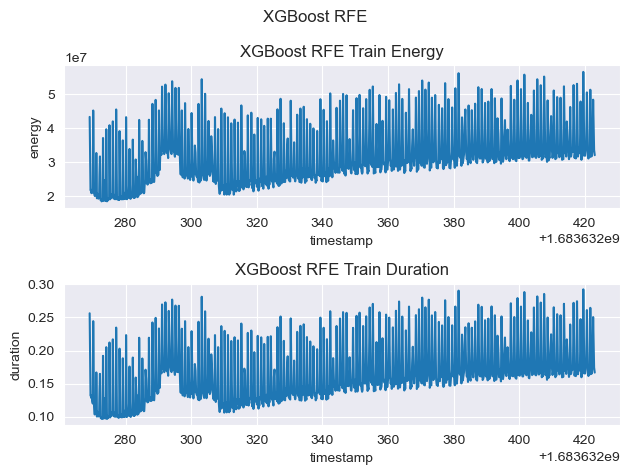

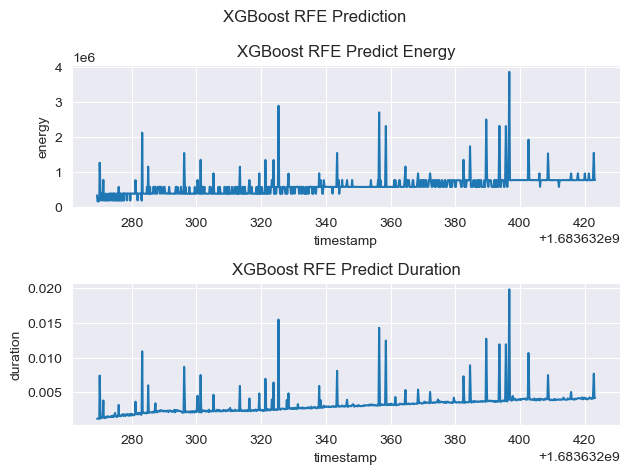

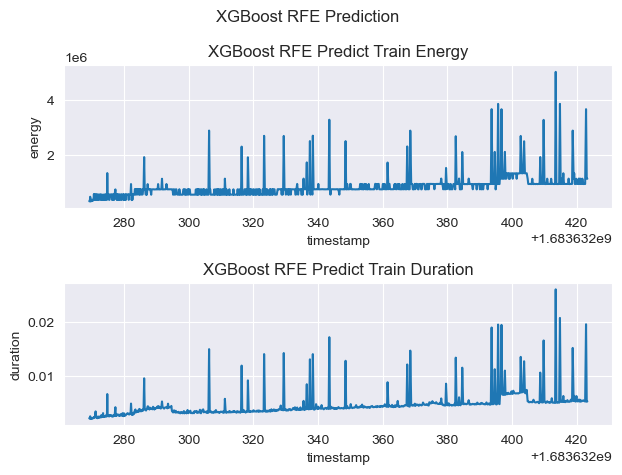

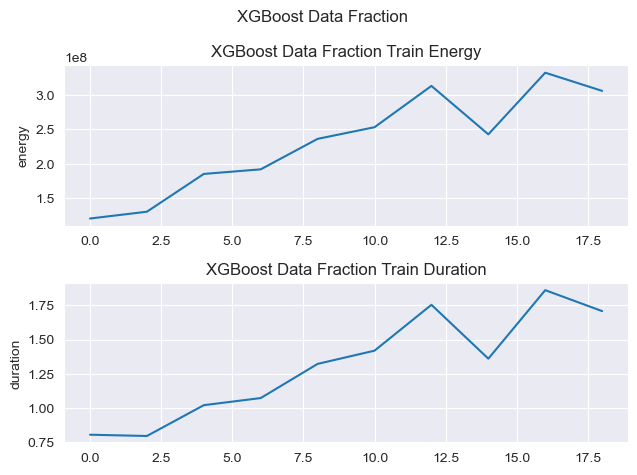

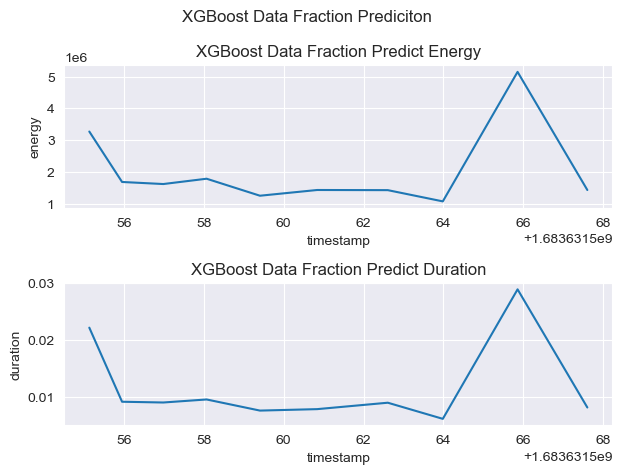

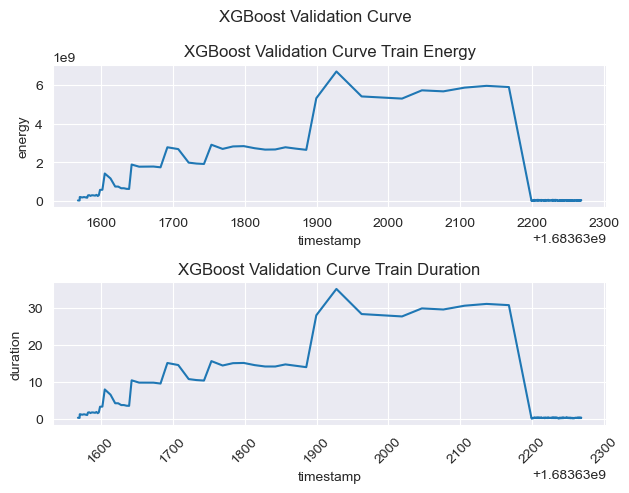

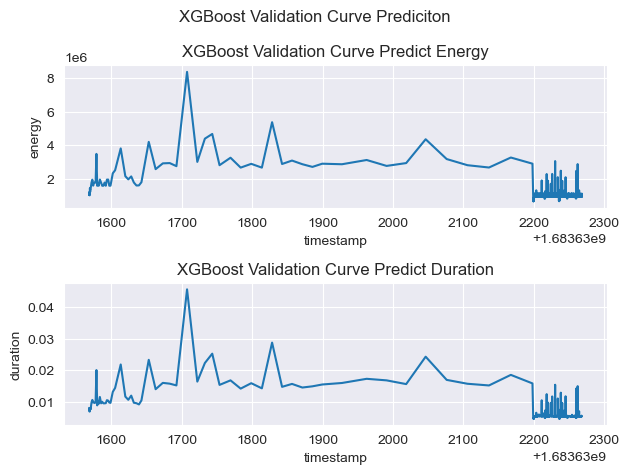

In [3]:
xgb_cv, xgb_rfe, xgb_df, xgb_vc = plot_power_measurements('XGBoost', 'xgb_exp_10')

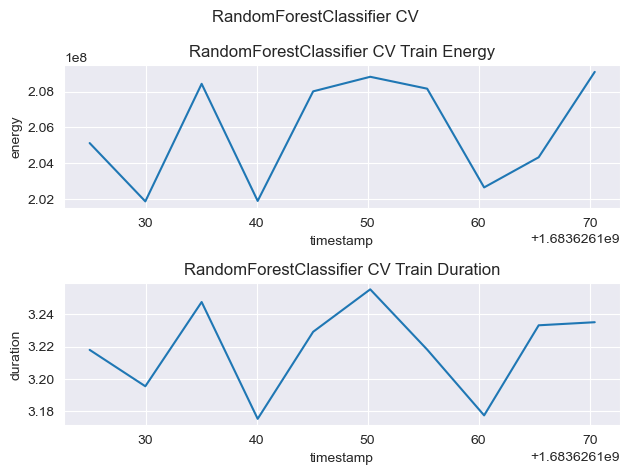

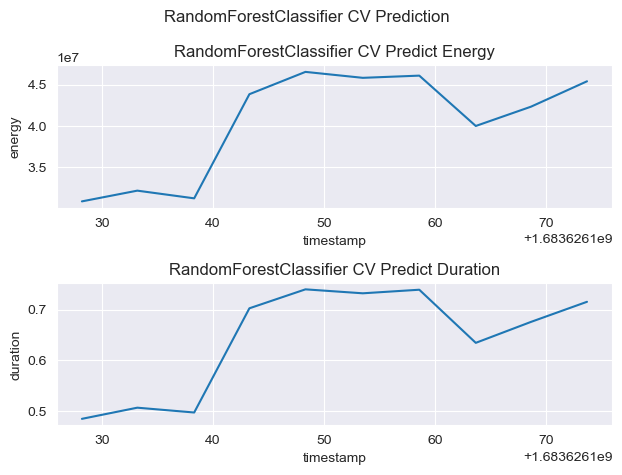

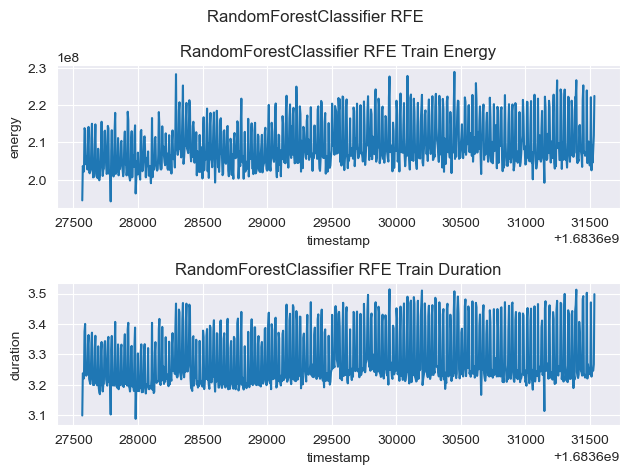

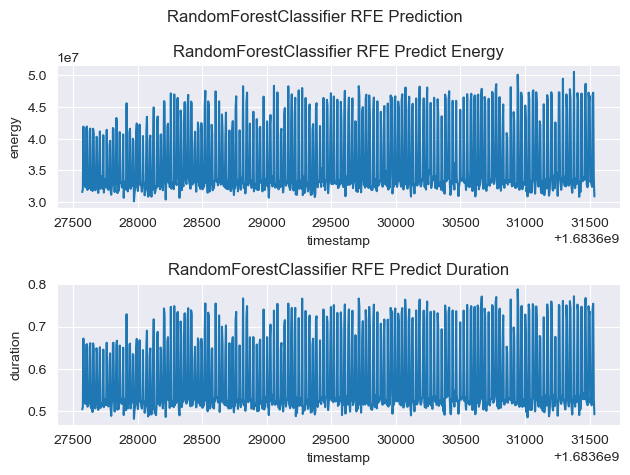

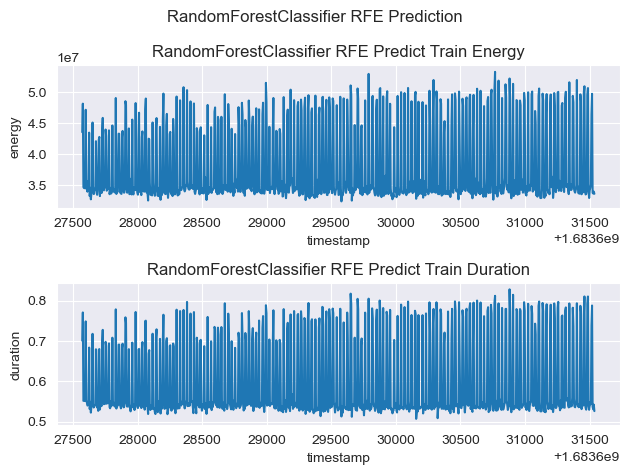

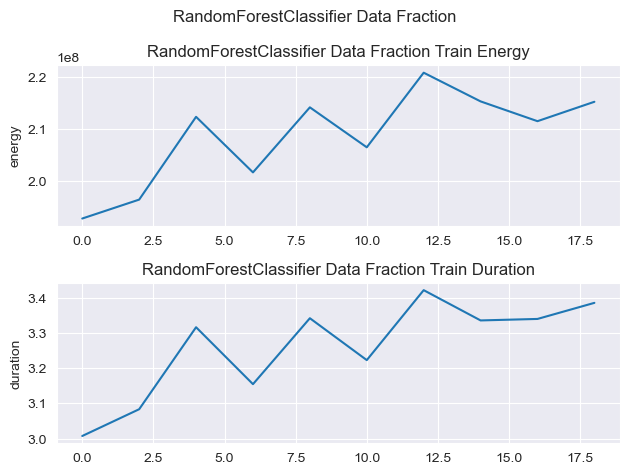

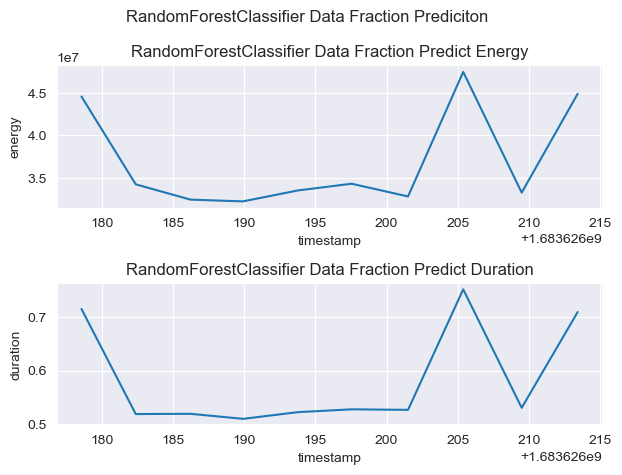

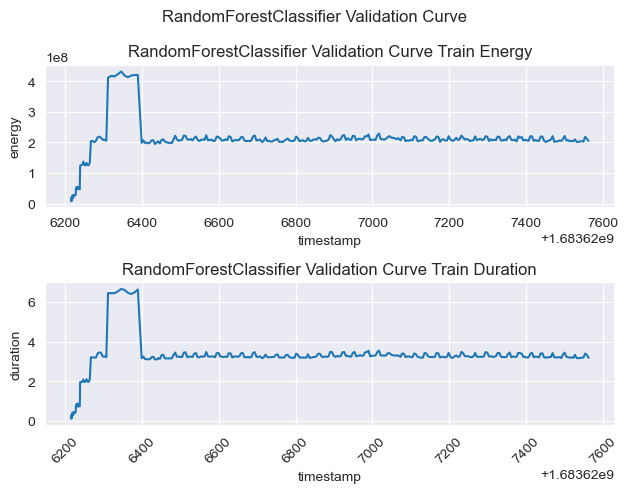

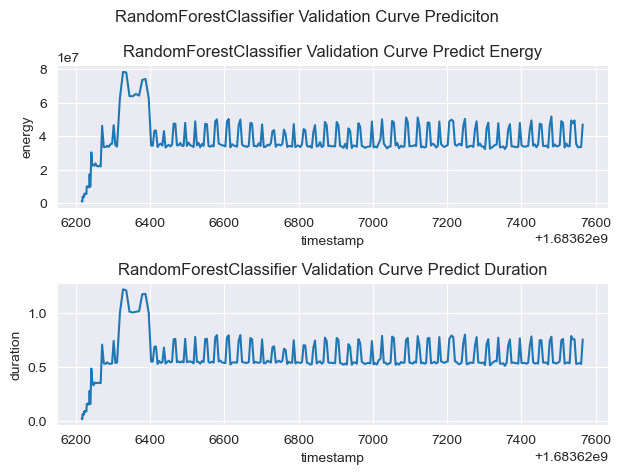

In [4]:
rf_cv, rf_rfe, rf_df, rf_vc = plot_power_measurements('RandomForestClassifier', 'rdf_exp_10')

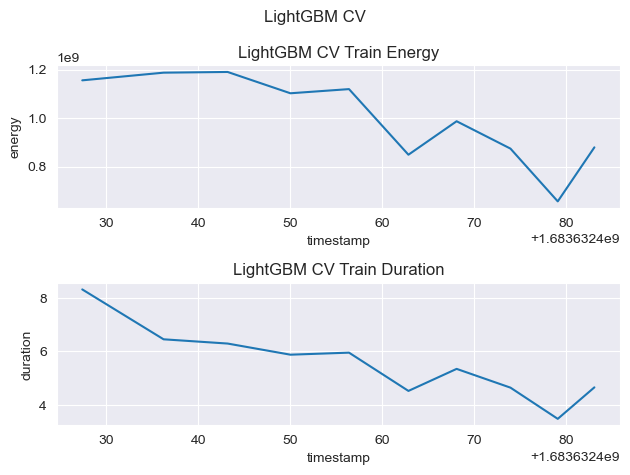

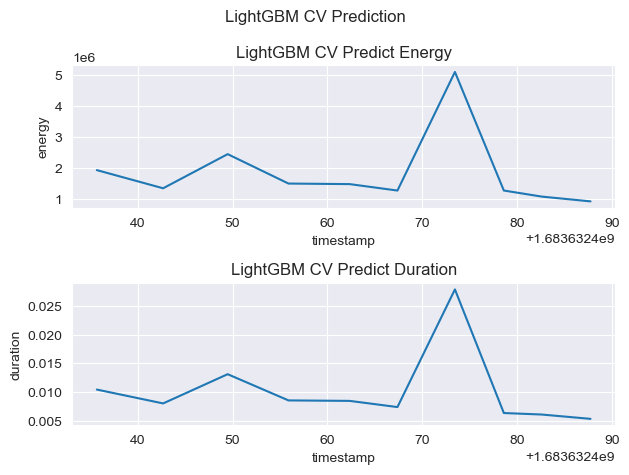

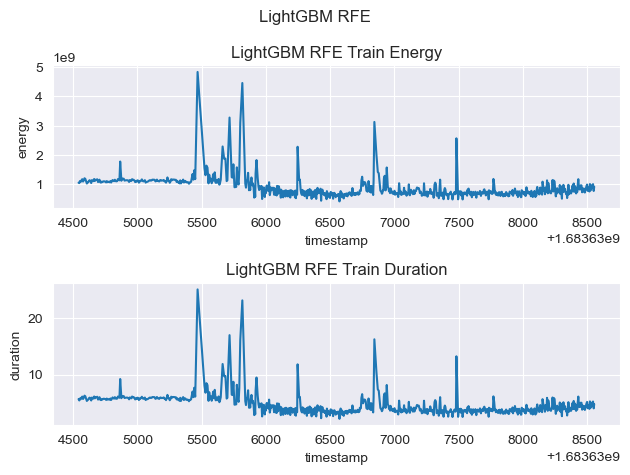

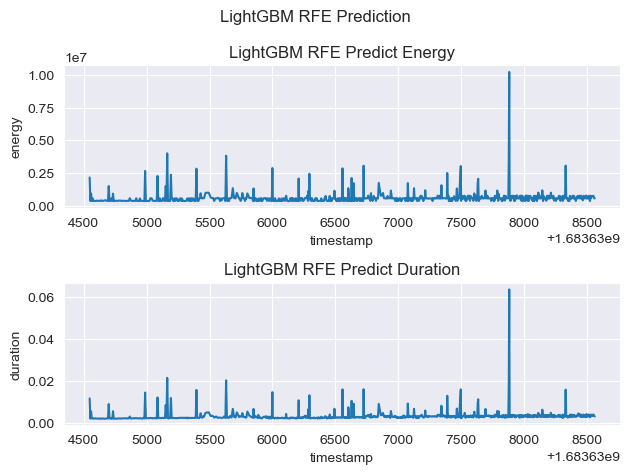

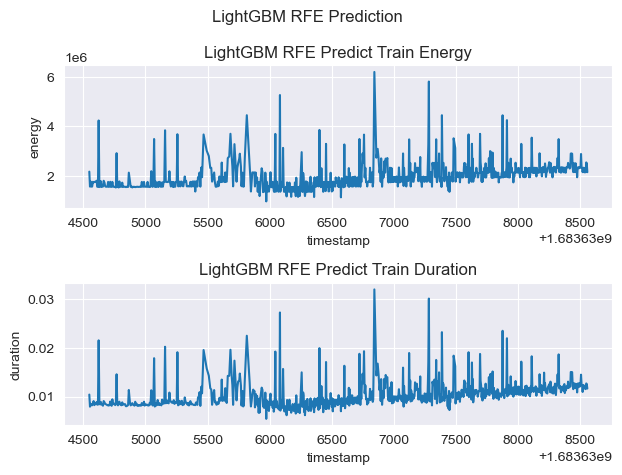

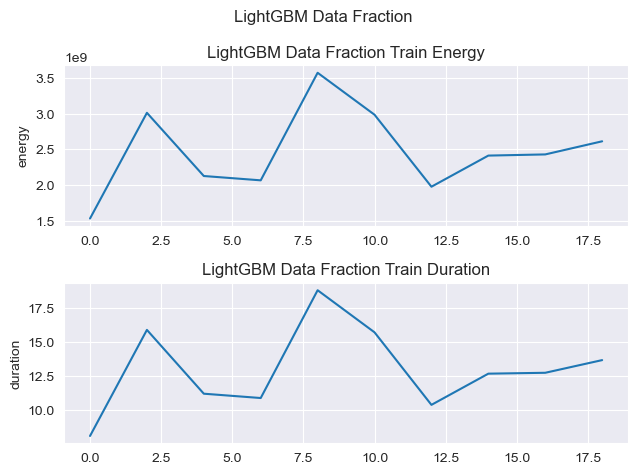

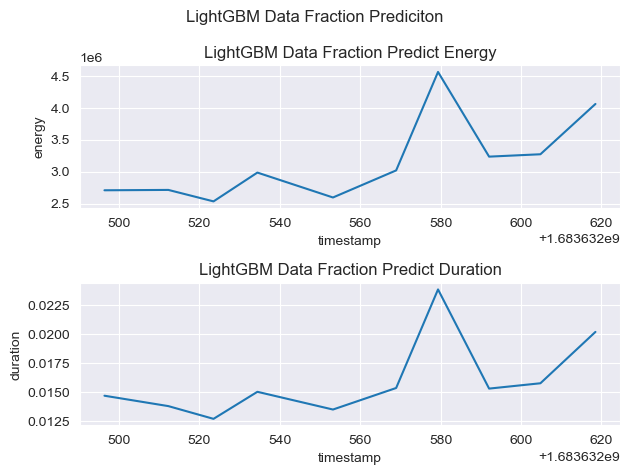

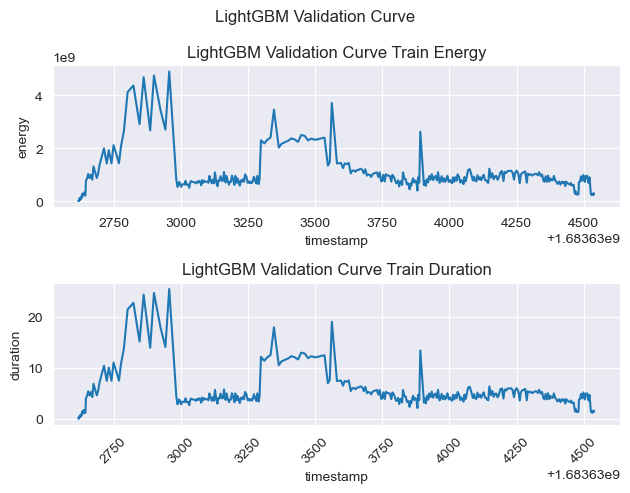

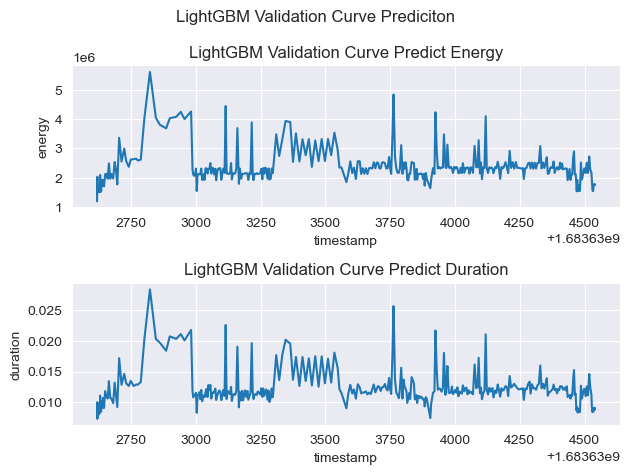

In [5]:
lgbm_cv, lgbm_rfe, lgbm_df, lgbm_vc = plot_power_measurements('LightGBM', 'lgbm_exp_10')

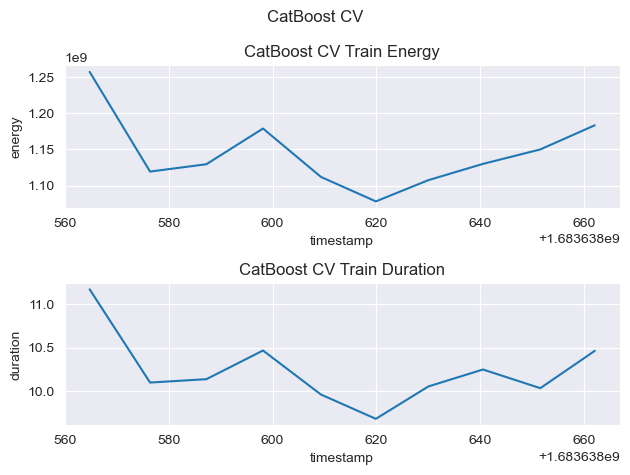

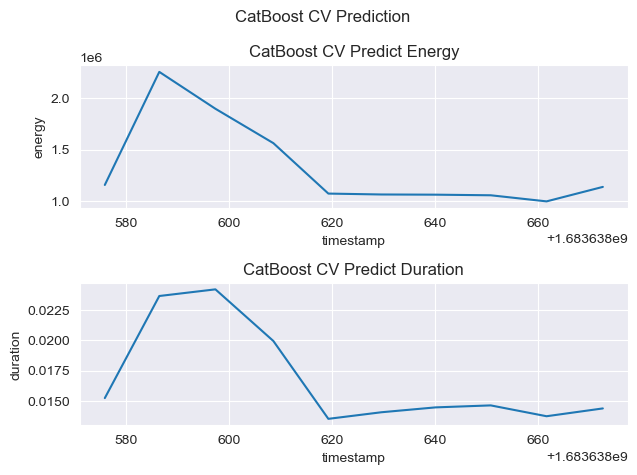

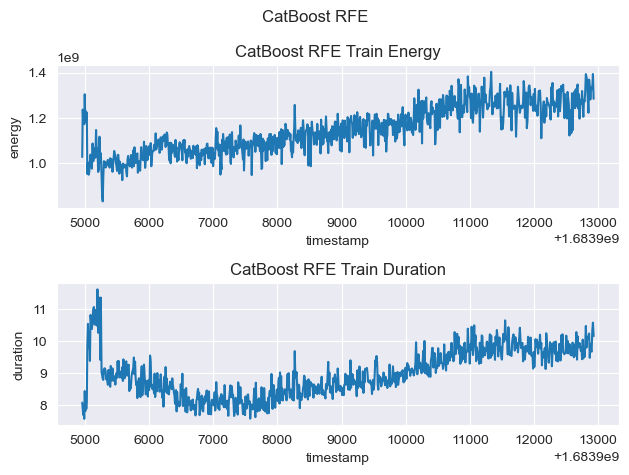

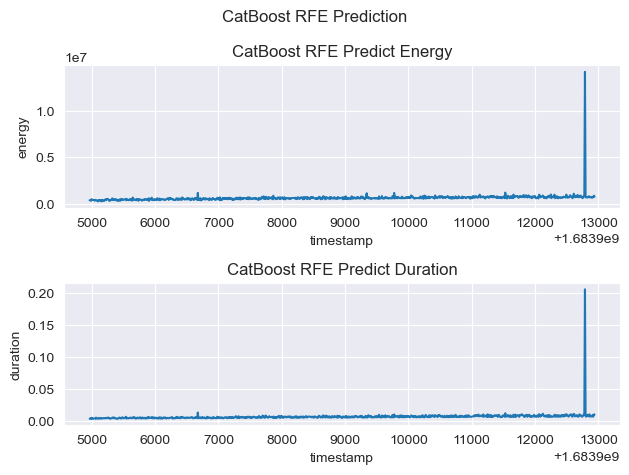

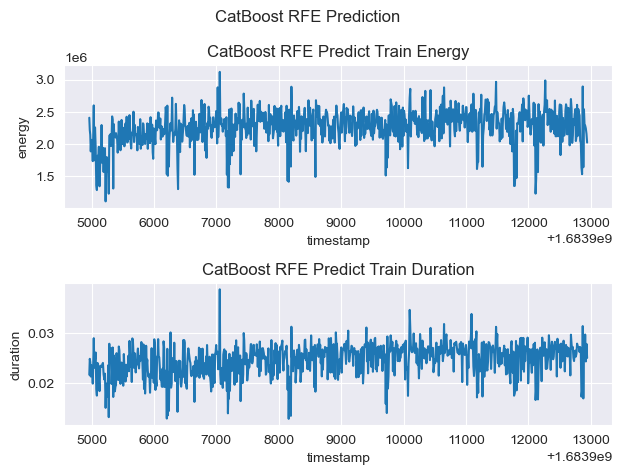

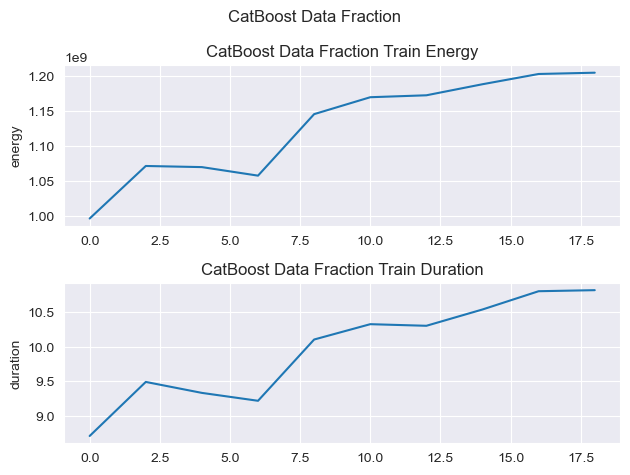

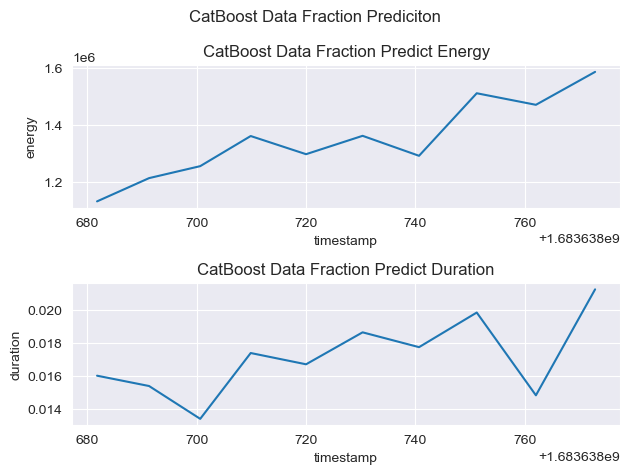

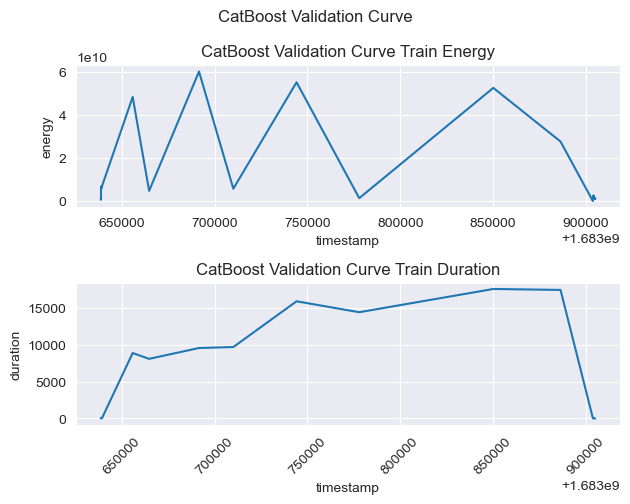

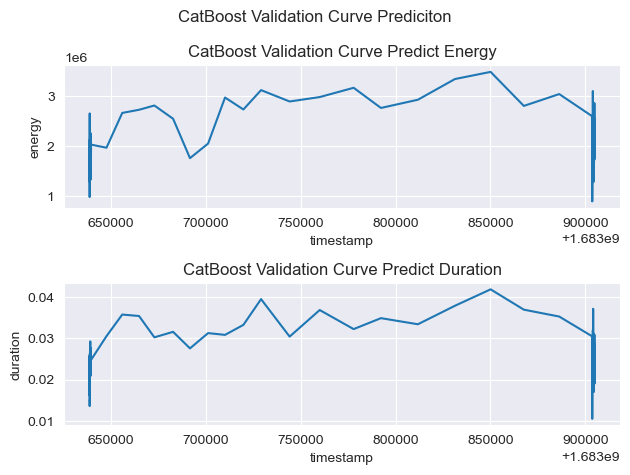

In [6]:
cat_cv, cat_rfe, cat_df, cat_vc = plot_power_measurements('CatBoost', 'cat_exp_10')

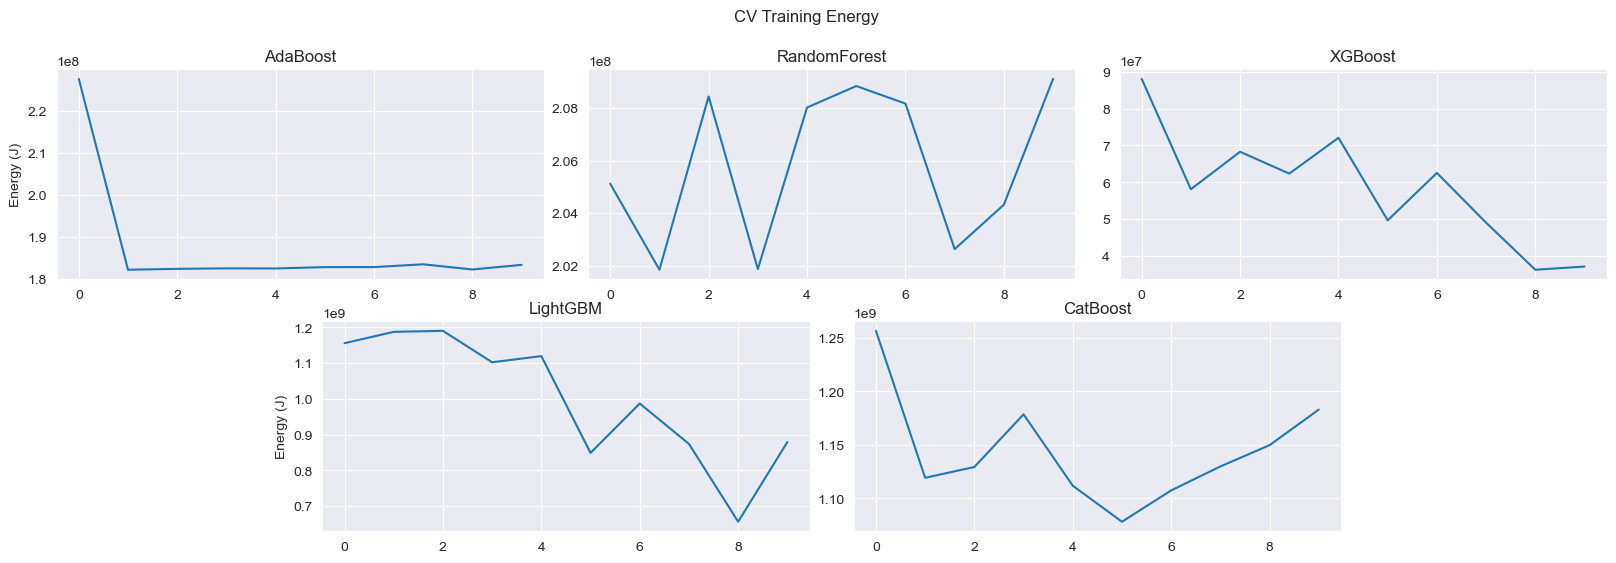

In [7]:
# Compare energy consumption of all models
import matplotlib as mpl
def compare_model_plots():
    # fig_comp, axes_comp = plt.subplots(2,3)
    #
    # ada_cv[ada_cv['tag'].str.contains('train')].reset_index()['energy'].plot(ax=axes_comp[0,0])
    # rf_cv[rf_cv['tag'].str.contains('train')].reset_index()['energy'].plot(ax=axes_comp[0,1])
    # xgb_cv[xgb_cv['tag'].str.contains('train')].reset_index()['energy'].plot(ax=axes_comp[0,2])
    # lgbm_cv[lgbm_cv['tag'].str.contains('train')].reset_index()['energy'].plot(ax=axes_comp[1,0])
    # lgbm_cv[lgbm_cv['tag'].str.contains('train')].reset_index()['energy'].plot(ax=axes_comp[1,1])
    # fig_comp.tight_layout()
    # plt.show()

    fig = plt.figure(figsize=(20,6))
    spec = mpl.gridspec.GridSpec(ncols=6, nrows=2)
    ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
    ax2 = fig.add_subplot(spec[0,2:4])
    ax3 = fig.add_subplot(spec[0,4:])
    ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
    ax5 = fig.add_subplot(spec[1,3:5])
    ada_cv[ada_cv['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax1).set(title='AdaBoost')
    rf_cv[rf_cv['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax2).set(title='RandomForest')
    xgb_cv[xgb_cv['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax3).set(title='XGBoost')
    lgbm_cv[lgbm_cv['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax4).set(title='LightGBM')
    cat_cv[cat_cv['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax5).set(title='CatBoost')
    ax1.set_ylabel('Energy (J)')
    # ax2.set_ylabel('Energy (J)')
    # ax3.set_ylabel('Energy (J)')
    ax4.set_ylabel('Energy (J)')
    # ax5.set_ylabel('Energy (J)')
    fig.suptitle('CV Training Energy')
    plt.show()

# ada_cv[ada_cv['tag'].str.contains('train')].boxplot(column=['energy'])
compare_model_plots()

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/1567665119.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['AdaBoost', 'RandomForest', 'XGBoost', 'LightGBM', 'CatBoost'])


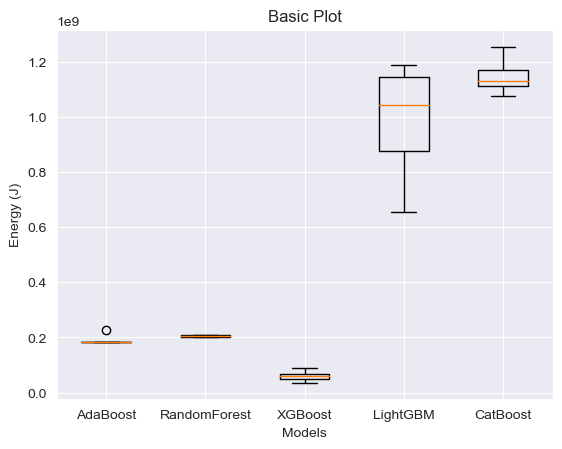

In [8]:
# Boxplot of energy consumption CV
df_box = pd.DataFrame()
df_box['AdaBoost'] = ada_cv[ada_cv['tag'].str.contains('train')].reset_index()['energy']
df_box['RandomForest'] = rf_cv[rf_cv['tag'].str.contains('train')].reset_index()['energy']
df_box['XGBoost'] = xgb_cv[xgb_cv['tag'].str.contains('train')].reset_index()['energy']
df_box['LightGBM'] = lgbm_cv[lgbm_cv['tag'].str.contains('train')].reset_index()['energy']
df_box['CatBoost'] = cat_cv[cat_cv['tag'].str.contains('train')].reset_index()['energy']
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
# ax1.set_yscale('log')
ax1.set_xticklabels(['AdaBoost', 'RandomForest', 'XGBoost', 'LightGBM', 'CatBoost'])
ax1.set_ylabel('Energy (J)')
ax1.set_xlabel('Models')
ax1.boxplot(df_box)
plt.show()

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/2971287783.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ada_rfe[~(ada_rfe['energy'] < 0)][ada_rfe['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax1).set(title='AdaBoost')
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/2971287783.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rf_rfe[~(rf_rfe['energy'] < 0)][rf_rfe['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax2).set(title='RandomForest')
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/2971287783.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xgb_rfe[~(xgb_rfe['energy'] < 0)][xgb_rfe['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax3).set(title='XGBoost')
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/2971287783.py:12: UserWarning: Boolean Series key will be re

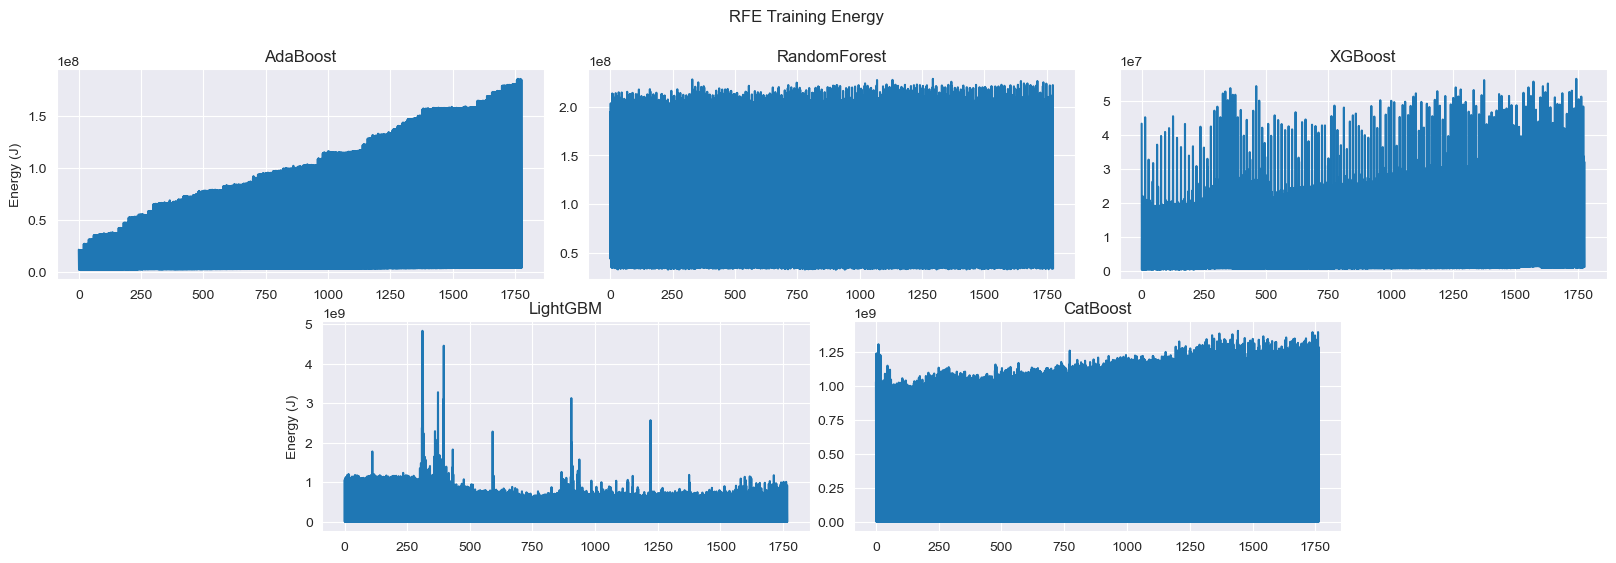

In [9]:
# RFE all models
fig = plt.figure(figsize=(20,6))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2)
ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
ax2 = fig.add_subplot(spec[0,2:4])
ax3 = fig.add_subplot(spec[0,4:])
ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
ax5 = fig.add_subplot(spec[1,3:5])
ada_rfe[~(ada_rfe['energy'] < 0)][ada_rfe['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax1).set(title='AdaBoost')
rf_rfe[~(rf_rfe['energy'] < 0)][rf_rfe['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax2).set(title='RandomForest')
xgb_rfe[~(xgb_rfe['energy'] < 0)][xgb_rfe['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax3).set(title='XGBoost')
lgbm_rfe[~(lgbm_rfe['energy'] < 0)][lgbm_rfe['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax4).set(title='LightGBM')
cat_rfe[~(cat_rfe['energy'] < 0)][cat_rfe['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax5).set(title='CatBoost')
ax1.set_ylabel('Energy (J)')
# ax2.set_ylabel('Energy (J)')
# ax3.set_ylabel('Energy (J)')
ax4.set_ylabel('Energy (J)')
# ax5.set_ylabel('Energy (J)')
fig.suptitle('RFE Training Energy')
plt.show()

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/178116066.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_box['AdaBoost'] = ada_rfe[~(ada_rfe['energy'] < 0)][ada_rfe['tag'].str.contains('train')].reset_index()['energy']
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/178116066.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_box['RandomForest'] = rf_rfe[~(rf_rfe['energy'] < 0)][rf_rfe['tag'].str.contains('train')].reset_index()['energy'] # to compacted
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/178116066.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_box['XGBoost'] = xgb_rfe[~(xgb_rfe['energy'] < 0)][xgb_rfe['tag'].str.contains('train')].reset_index()['energy']
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/178116066.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


{'whiskers': [<matplotlib.lines.Line2D at 0x164da6c10>,
 'caps': [<matplotlib.lines.Line2D at 0x164fc97f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x164decac0>,
 'medians': [<matplotlib.lines.Line2D at 0x164decb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x164deca30>,
 'means': []}

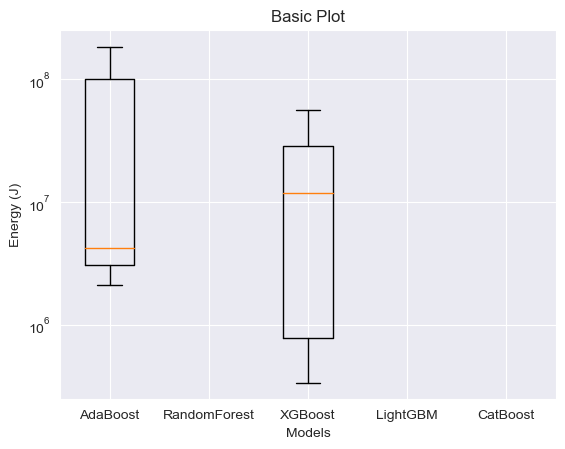

In [10]:
# Boxplot of energy consumption rfe
df_box = pd.DataFrame()
df_box['AdaBoost'] = ada_rfe[~(ada_rfe['energy'] < 0)][ada_rfe['tag'].str.contains('train')].reset_index()['energy']
df_box['RandomForest'] = rf_rfe[~(rf_rfe['energy'] < 0)][rf_rfe['tag'].str.contains('train')].reset_index()['energy'] # to compacted
df_box['XGBoost'] = xgb_rfe[~(xgb_rfe['energy'] < 0)][xgb_rfe['tag'].str.contains('train')].reset_index()['energy']
df_box['LightGBM'] = lgbm_rfe[~(lgbm_rfe['energy'] < 0)][lgbm_rfe['tag'].str.contains('train')].reset_index()['energy']
df_box['CatBoost'] = cat_cv[cat_cv['tag'].str.contains('train')].reset_index()['energy']
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.set_yscale('log')
ax1.set_xticklabels(['AdaBoost', 'RandomForest', 'XGBoost', 'LightGBM', 'CatBoost'])
ax1.set_ylabel('Energy (J)')
ax1.set_xlabel('Models')
ax1.boxplot(df_box)

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/2657488009.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ada_rfe[~(ada_rfe['energy'] < 0)][ada_rfe['tag'].str.contains('predict')].reset_index()['energy'].plot(ax=ax1).set(title='AdaBoost')
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/2657488009.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rf_rfe[~(rf_rfe['energy'] < 0)][rf_rfe['tag'].str.contains('predict')].reset_index()['energy'].plot(ax=ax2).set(title='RandomForest')
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/2657488009.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xgb_rfe[~(xgb_rfe['energy'] < 0)][xgb_rfe['tag'].str.contains('predict')].reset_index()['energy'].plot(ax=ax3).set(title='XGBoost')
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/2657488009.py:12: UserWarning: Boolean Series key will

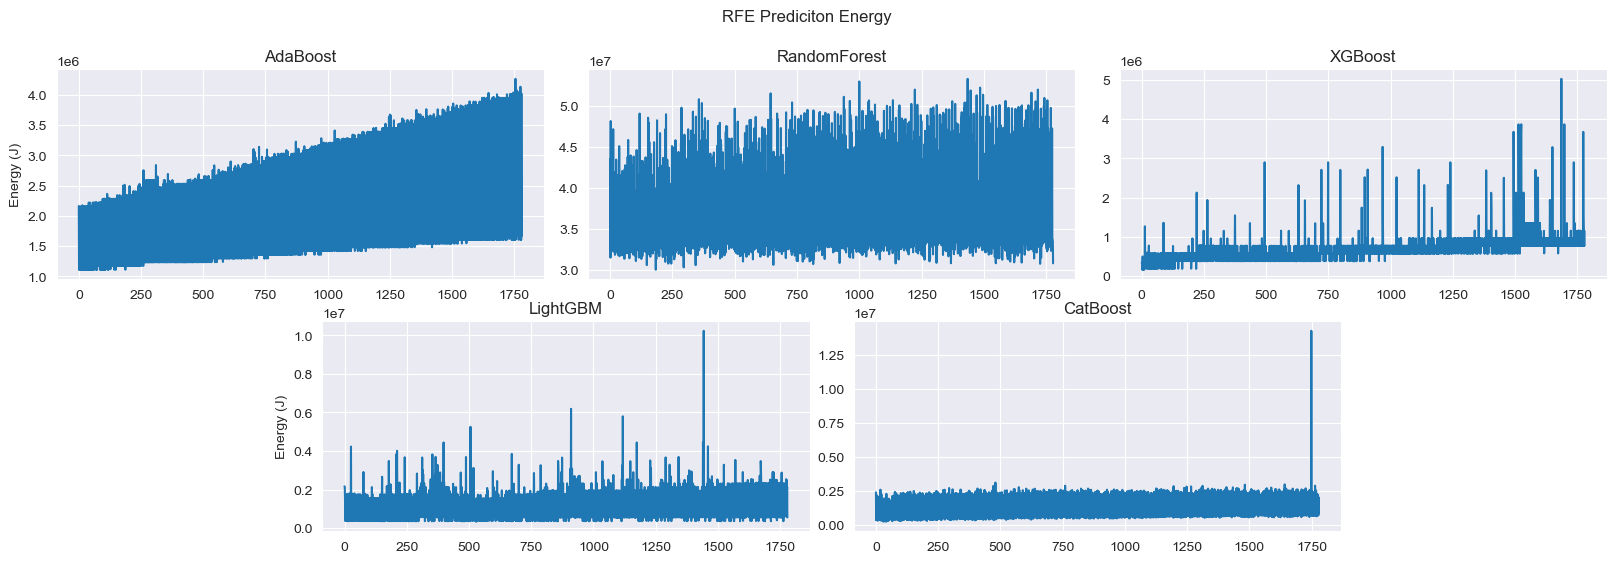

In [11]:
# RFE all models
fig = plt.figure(figsize=(20,6))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2)
ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
ax2 = fig.add_subplot(spec[0,2:4])
ax3 = fig.add_subplot(spec[0,4:])
ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
ax5 = fig.add_subplot(spec[1,3:5])
ada_rfe[~(ada_rfe['energy'] < 0)][ada_rfe['tag'].str.contains('predict')].reset_index()['energy'].plot(ax=ax1).set(title='AdaBoost')
rf_rfe[~(rf_rfe['energy'] < 0)][rf_rfe['tag'].str.contains('predict')].reset_index()['energy'].plot(ax=ax2).set(title='RandomForest')
xgb_rfe[~(xgb_rfe['energy'] < 0)][xgb_rfe['tag'].str.contains('predict')].reset_index()['energy'].plot(ax=ax3).set(title='XGBoost')
lgbm_rfe[~(lgbm_rfe['energy'] < 0)][lgbm_rfe['tag'].str.contains('predict')].reset_index()['energy'].plot(ax=ax4).set(title='LightGBM')
cat_rfe[~(cat_rfe['energy'] < 0)][cat_rfe['tag'].str.contains('predict')].reset_index()['energy'].plot(ax=ax5).set(title='CatBoost')
ax1.set_ylabel('Energy (J)')
# ax2.set_ylabel('Energy (J)')
# ax3.set_ylabel('Energy (J)')
ax4.set_ylabel('Energy (J)')
# ax5.set_ylabel('Energy (J)')
fig.suptitle('RFE Prediciton Energy')
plt.show()

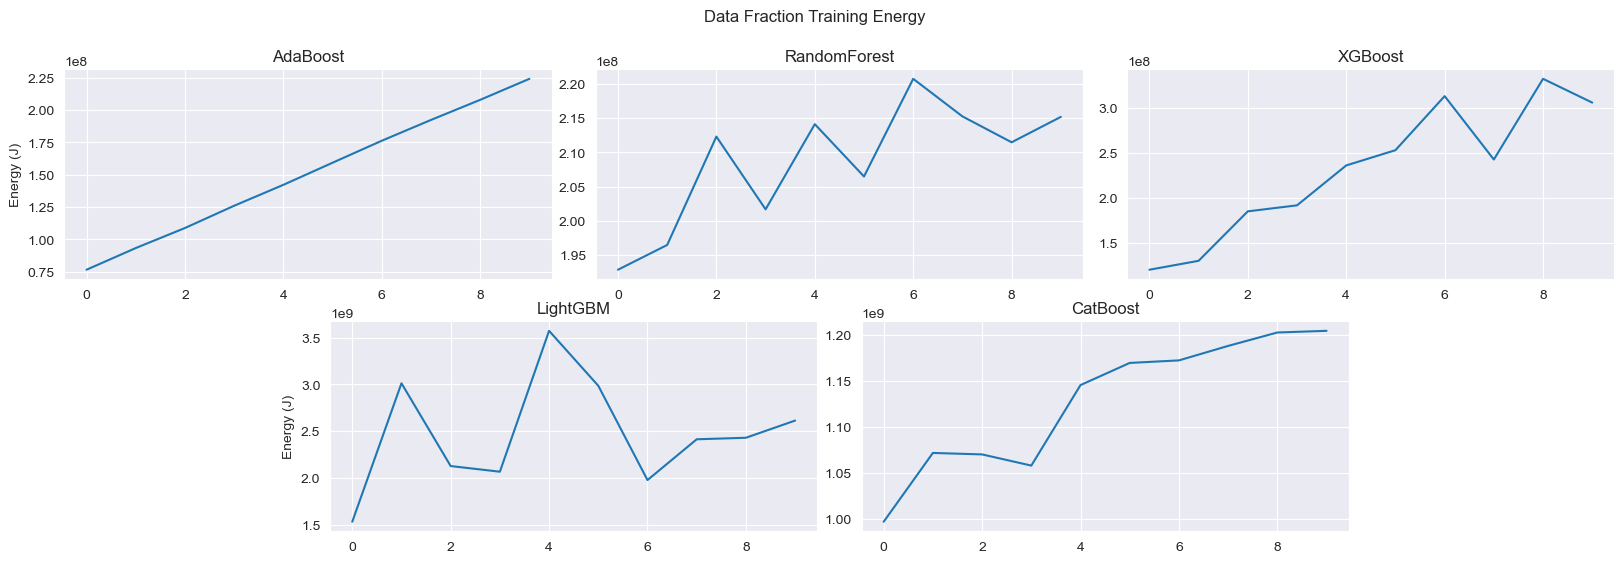

In [12]:
# ada_df[~(ada_df['energy'] < 0)][ada_df['tag'].str.contains('train')].reset_index()['energy'].plot()
# rf_df[~(rf_df['energy'] < 0)][rf_df['tag'].str.contains('train')].reset_index()['energy'].plot()
# lgbm_df[~(lgbm_df['energy'] < 0)][lgbm_df['tag'].str.contains('train')].reset_index()['energy'].plot()
# xgb_df[~(xgb_df['energy'] < 0)][xgb_df['tag'].str.contains('train')].reset_index()['energy'].plot()


# RFE all models
fig = plt.figure(figsize=(20,6))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2)
ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
ax2 = fig.add_subplot(spec[0,2:4])
ax3 = fig.add_subplot(spec[0,4:])
ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
ax5 = fig.add_subplot(spec[1,3:5])
ada_df[~(ada_df['energy'] < 0)][ada_df['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax1).set(title='AdaBoost')
rf_df[~(rf_df['energy'] < 0)][rf_df['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax2).set(title='RandomForest')
xgb_df[~(xgb_df['energy'] < 0)][xgb_df['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax3).set(title='XGBoost')
lgbm_df[~(lgbm_df['energy'] < 0)][lgbm_df['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax4).set(title='LightGBM')
cat_df[~(cat_df['energy'] < 0)][cat_df['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax5).set(title='CatBoost')
ax1.set_ylabel('Energy (J)')
# ax2.set_ylabel('Energy (J)')
# ax3.set_ylabel('Energy (J)')
ax4.set_ylabel('Energy (J)')
# ax5.set_ylabel('Energy (J)')
fig.suptitle('Data Fraction Training Energy')
plt.show()

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/1176661928.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lgbm_vc[~(lgbm_vc['energy'] < 0)][lgbm_vc['tag'].str.contains('train')].reset_index()['energy'].plot()
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/1176661928.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xgb_vc[~(xgb_vc['energy'] < 0)][xgb_vc['tag'].str.contains('train')].reset_index()['energy'].plot()
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/1176661928.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cat_vc[~(cat_vc['energy'] < 0)][cat_vc['tag'].str.contains('train')].reset_index()['energy'].plot()


<AxesSubplot: >

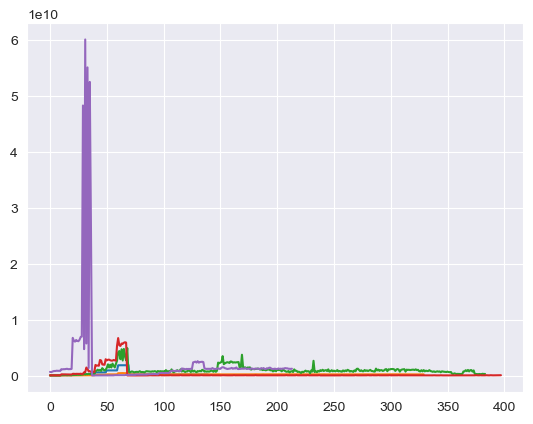

In [13]:
# Validation curve different parameter values
ada_vc[~(ada_vc['energy'] < 0)][ada_vc['tag'].str.contains('train')].reset_index()['energy'].plot()
rf_vc[~(rf_vc['energy'] < 0)][rf_vc['tag'].str.contains('train')].reset_index()['energy'].plot()
lgbm_vc[~(lgbm_vc['energy'] < 0)][lgbm_vc['tag'].str.contains('train')].reset_index()['energy'].plot()
xgb_vc[~(xgb_vc['energy'] < 0)][xgb_vc['tag'].str.contains('train')].reset_index()['energy'].plot()
cat_vc[~(cat_vc['energy'] < 0)][cat_vc['tag'].str.contains('train')].reset_index()['energy'].plot()

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/3626236735.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lgbm_vc[~(lgbm_vc['energy'] < 0)][lgbm_vc['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax3).set(title='LightGBM')
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/3626236735.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xgb_vc[~(xgb_vc['energy'] < 0)][xgb_vc['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax4).set(title='XGBoost')
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/3626236735.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cat_vc[~(cat_vc['energy'] < 0)][cat_vc['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax5).set(title='CatBoost')


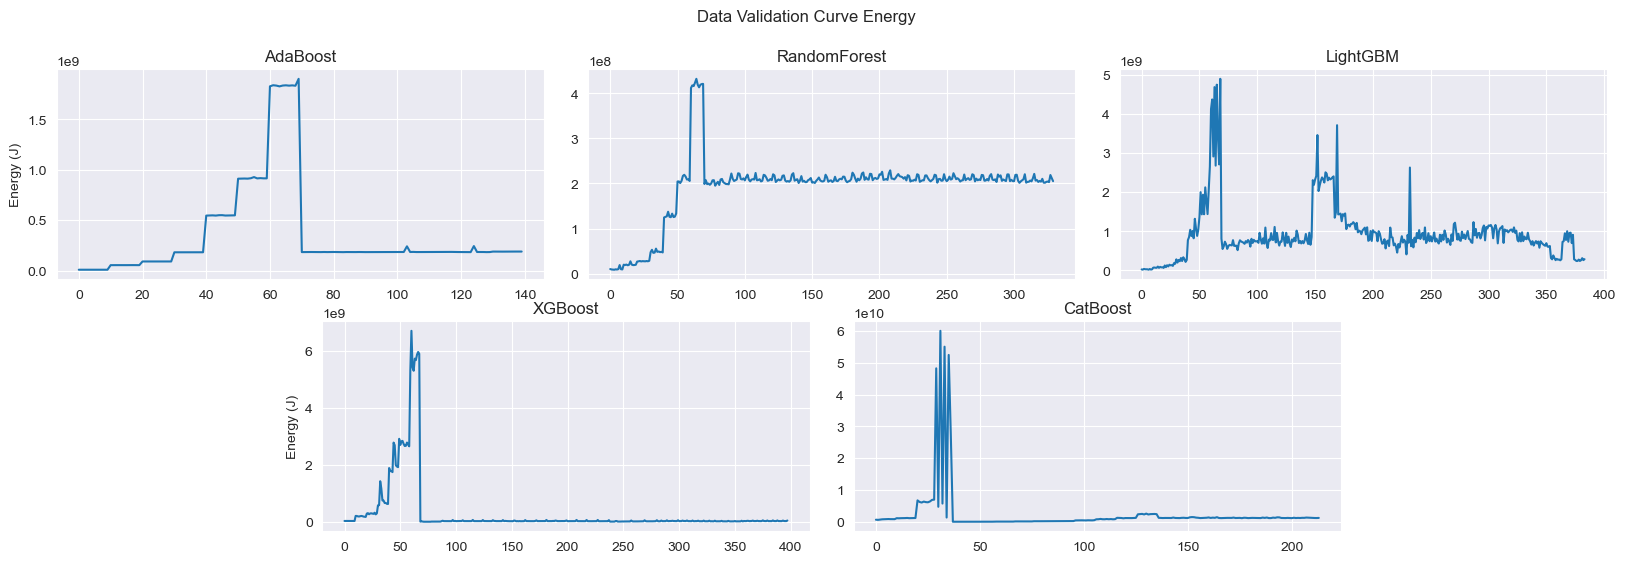

In [14]:
fig = plt.figure(figsize=(20,6))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2)
ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
ax2 = fig.add_subplot(spec[0,2:4])
ax3 = fig.add_subplot(spec[0,4:])
ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
ax5 = fig.add_subplot(spec[1,3:5])
ada_vc[~(ada_vc['energy'] < 0)][ada_vc['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax1).set(title='AdaBoost')
rf_vc[~(rf_vc['energy'] < 0)][rf_vc['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax2).set(title='RandomForest')
lgbm_vc[~(lgbm_vc['energy'] < 0)][lgbm_vc['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax3).set(title='LightGBM')
xgb_vc[~(xgb_vc['energy'] < 0)][xgb_vc['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax4).set(title='XGBoost')
cat_vc[~(cat_vc['energy'] < 0)][cat_vc['tag'].str.contains('train')].reset_index()['energy'].plot(ax=ax5).set(title='CatBoost')
ax1.set_ylabel('Energy (J)')
# ada_vc_tags = []
# for t in ada_vc[~(ada_vc['energy'] < 0)][ada_vc['tag'].str.contains('train')].reset_index()['tag']:
#     # print(t.split('_')[3].split(':')[1].split('}')[0])
#     # print(t.split('{')[1].split(':')[0][1:][:-1])
#     try:
#         # print(t.split('_')[3].split(':')[1].split('}')[0])
#         t.split('_')[3].split(':')[1].split('}')[0]
#     except:
#         # print(t.split('_')[2]).split(':')
#         print(t.split('{')[1])
#
#     # param_name_ada = t.split('{')[1].split(':')[0][1:][:-1]
#     # # print(param_name_ada)
#     # param_value_ada = t.split('_')[3].split(':')[1].split('}')[0]
#     # ada_vc_tags.append(f"{param_name_ada}_{param_value_ada}")
# print(len(ada_vc_tags))

# ax1.set_xticklabels(ada_vc[~(ada_vc['energy'] < 0)][ada_vc['tag'].str.contains('train')].reset_index()['tag'], rotation=45)
# ax2.set_ylabel('Energy (J)')
# ax3.set_ylabel('Energy (J)')
ax4.set_ylabel('Energy (J)')
# ax5.set_ylabel('Energy (J)')
fig.suptitle('Data Validation Curve Energy')
plt.show()

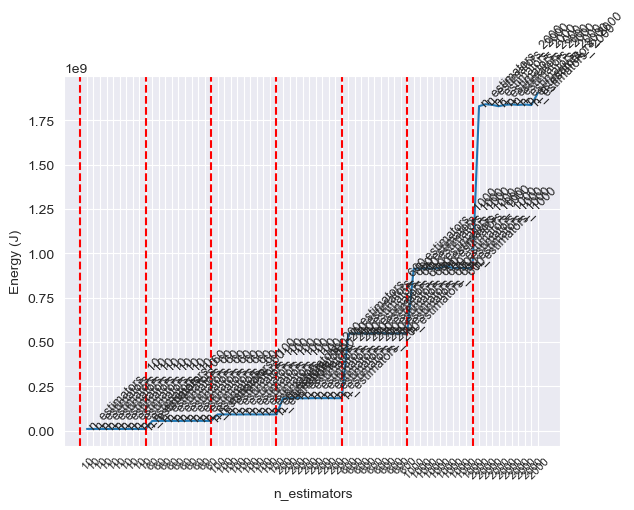

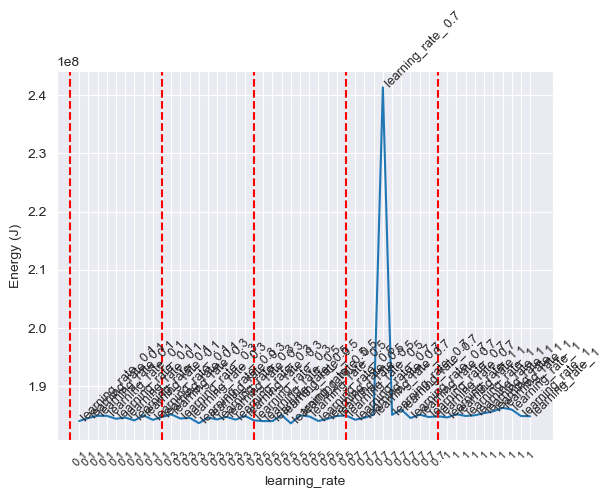

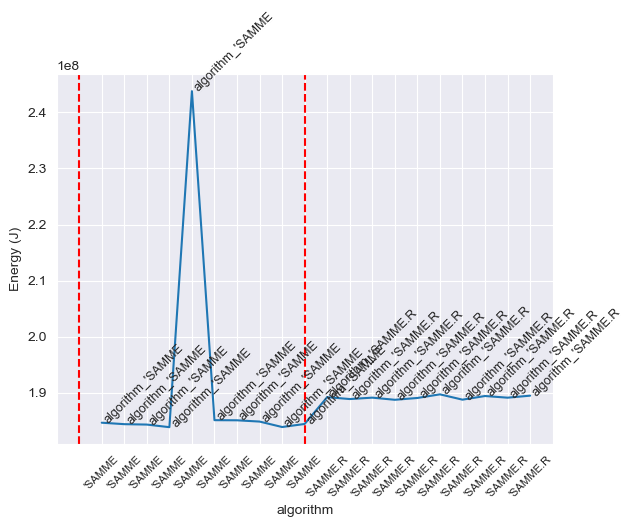

In [38]:
# Plot VC per model and per parameter

ada_param = ['n_estimators', 'learning_rate', 'algorithm']
pp = ada_vc[ada_vc['tag'].str.contains('train')]


for param in ada_param:
    p_tags = []
    p_tags_complete = []
    for t in pp[pp['tag'].str.contains(param)]['tag']:
        # print(t.split('_')[3].split(':')[1].split('}')[0])
        try:
            p_tags.append(t.split('_')[3].split(':')[1].split('}')[0])
            p_tags_complete.append(f"{param}_{t.split('_')[3].split(':')[1].split('}')[0]}")
        except:
            p_tags.append(t.split('_')[2].split(':')[1].split('}')[0][1:][:-1])
            p_tags_complete.append(f"{param}_{t.split('_')[2].split(':')[1].split('}')[0][1:][:-1]}")

    ax = pp[pp['tag'].str.contains(param)].reset_index()['energy'].plot(xticks=range(len(p_tags)))
    ax.set_xticklabels(p_tags, rotation=45)
    ax.set_xlabel(param)
    ax.set_ylabel('Energy (J)')
    for i, txt in enumerate(p_tags_complete):
        ax.annotate(txt, (i, pp[pp['tag'].str.contains(param)].reset_index()['energy'][i]), fontsize=9, rotation=45)

    # for l in range(len(p_tags)):
    #     ax.axvline(l, color="red", linestyle="--")

    for li, l in enumerate(range(len(p_tags))):
        if li % 10 == 0:
            ax.axvline(l-1, color="red", linestyle="--")
        # ax.axvline(l, color="red", linestyle="--")
    # ax.axvline(4, color="red", linestyle="--")
    plt.xticks(fontsize=8)
    plt.show()

[' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000']
70


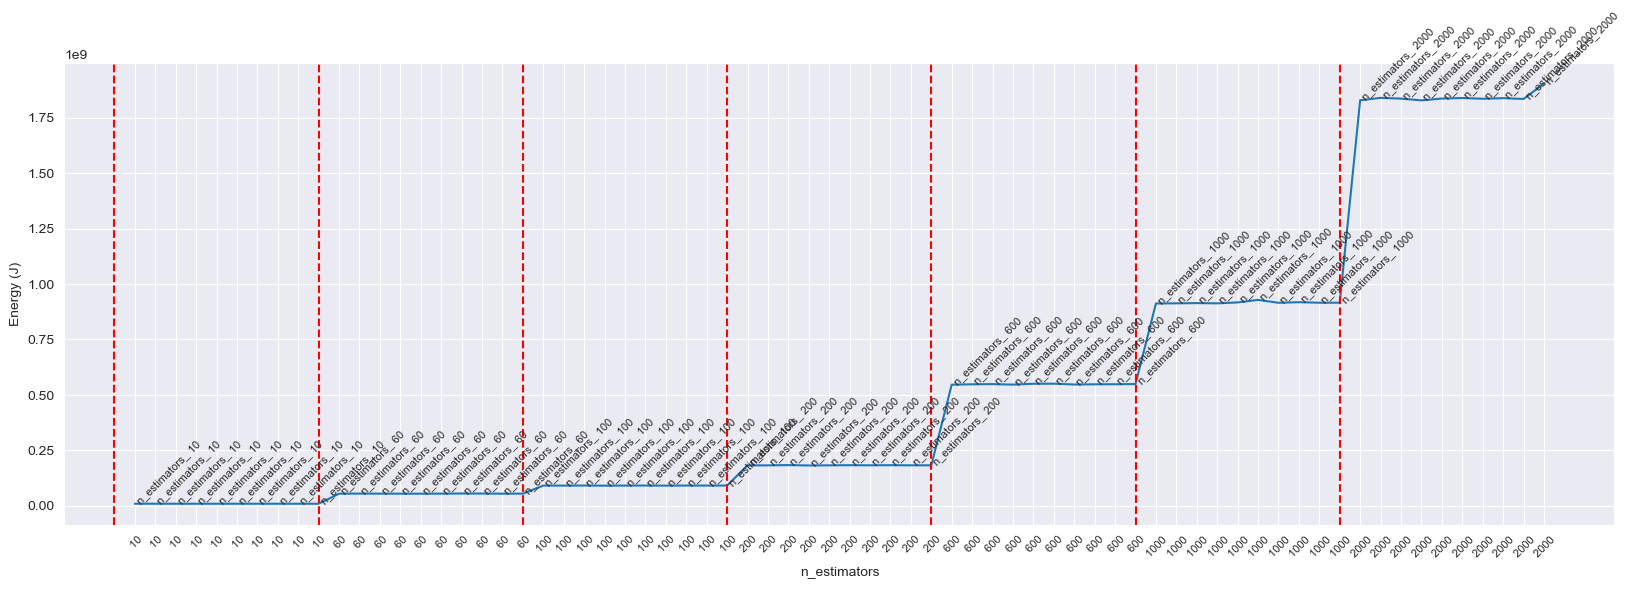

[' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1']
50


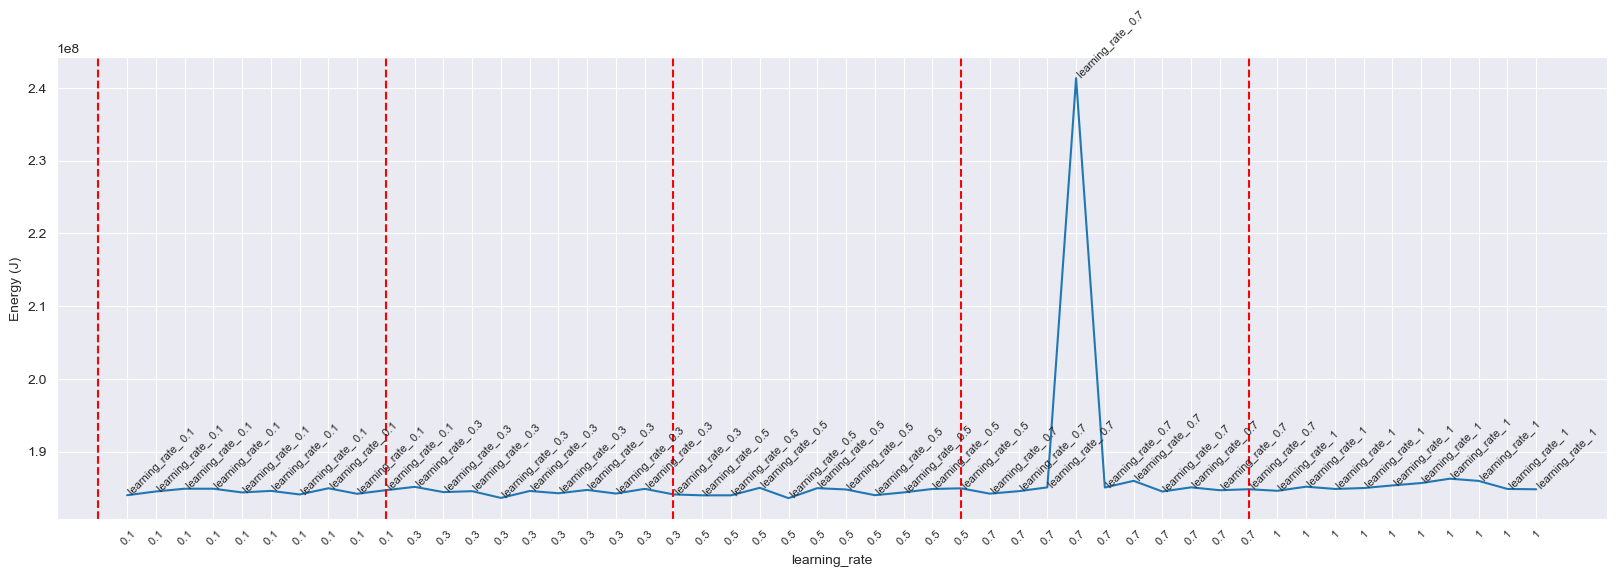

[" 'SAMME'", " 'SAMME'", " 'SAMME'", " 'SAMME'", " 'SAMME'", " 'SAMME'", " 'SAMME'", " 'SAMME'", " 'SAMME'", " 'SAMME'", " 'SAMME.R'", " 'SAMME.R'", " 'SAMME.R'", " 'SAMME.R'", " 'SAMME.R'", " 'SAMME.R'", " 'SAMME.R'", " 'SAMME.R'", " 'SAMME.R'", " 'SAMME.R'"]
20


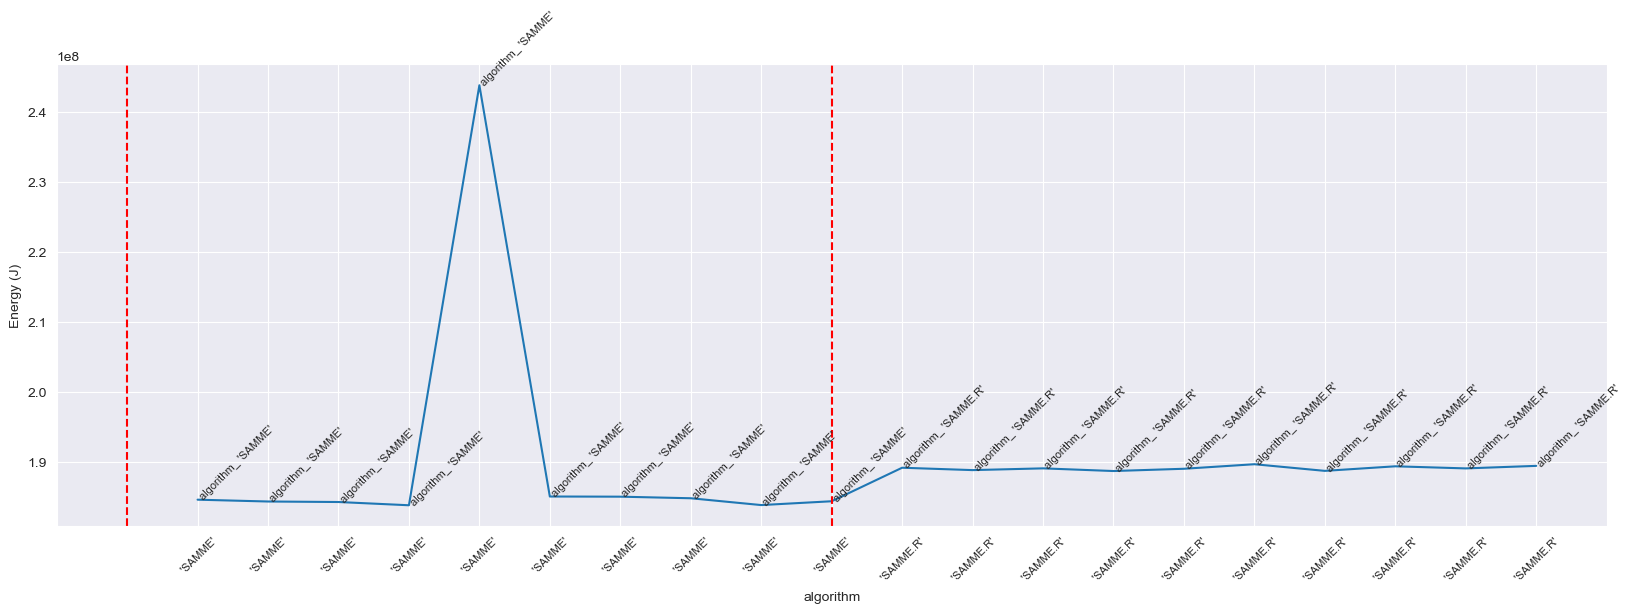

In [46]:
ada_param = ['n_estimators', 'learning_rate', 'algorithm']

def plot_on_param(df_cv,
                  param_vec,
                  mode='train',
                  add_tags=False,
                  cv_folds=5,
                  ):
    # pp = df_cv[df_cv['tag'].str.contains(mode)]

    pp = df_cv[~(df_cv['energy'] < 0)][df_cv['tag'].str.contains(mode)]
    for param in param_vec:
        fig = plt.figure(figsize=(20,6))
        p_tags = []
        p_tags_complete = []
        for t in pp[pp['tag'].str.contains(param)]['tag']:
            # print(t.split('_')[3].split(':')[1].split('}')[0])
            # if param == 'subsample':
            #     print(t.split(':')[1].split('}')[0])
            #     print(t.split(':')[1].split('}')[0][1:][:-1])
            try:
                p_tags.append(t.split('_')[3].split(':')[1].split('}')[0])
                p_tags_complete.append(f"{param}_{t.split('_')[3].split(':')[1].split('}')[0]}")
            except:
                # print(t.split(':')[1].split('}')[0][1:][:-1])
                p_tags.append(t.split(':')[1].split('}')[0])
                # p_tags_complete.append(f"{param}_{t.split('_')[2].split(':')[1].split('}')[0][1:][:-1]}")
                p_tags_complete.append(f"{param}_{t.split(':')[1].split('}')[0]}")
        ax = pp[pp['tag'].str.contains(param)].reset_index()['energy'].plot(xticks=range(len(p_tags)))
        print(p_tags)
        ax.set_xticklabels(p_tags, rotation=45)
        ax.set_xlabel(param)
        ax.set_ylabel('Energy (J)')

        if add_tags:
            for i, txt in enumerate(p_tags_complete):
                ax.annotate(txt, (i, pp[pp['tag'].str.contains(param)].reset_index()['energy'][i]), fontsize=8, rotation=45)

        # for l in range(len(p_tags)):
        #     ax.axvline(l, color="red", linestyle="--")
        print(len(p_tags))
        for li, l in enumerate(range(len(p_tags))):
            if li % cv_folds == 0:
                ax.axvline(l-1, color="red", linestyle="--")
            # ax.axvline(l, color="red", linestyle="--")
        # ax.axvline(4, color="red", linestyle="--")
        # ax.set_xticks(ax.get_xticks()[::cv_folds]) # sample every nth element parameter value based on the number of cv folds
        ax.minorticks_on()
        plt.xticks(fontsize=8)
        plt.show()

plot_on_param(ada_vc, ada_param, add_tags=True, cv_folds=10)

# xgb_param = ['n_estimators', 'max_depth', 'learning_rate', 'subsample', 'min_child_weight', 'gamma']
# plot_on_param(xgb_vc, xgb_param)

# rf_param = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'criterion']
# plot_on_param(rf_vc, rf_param)

[' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000']
70


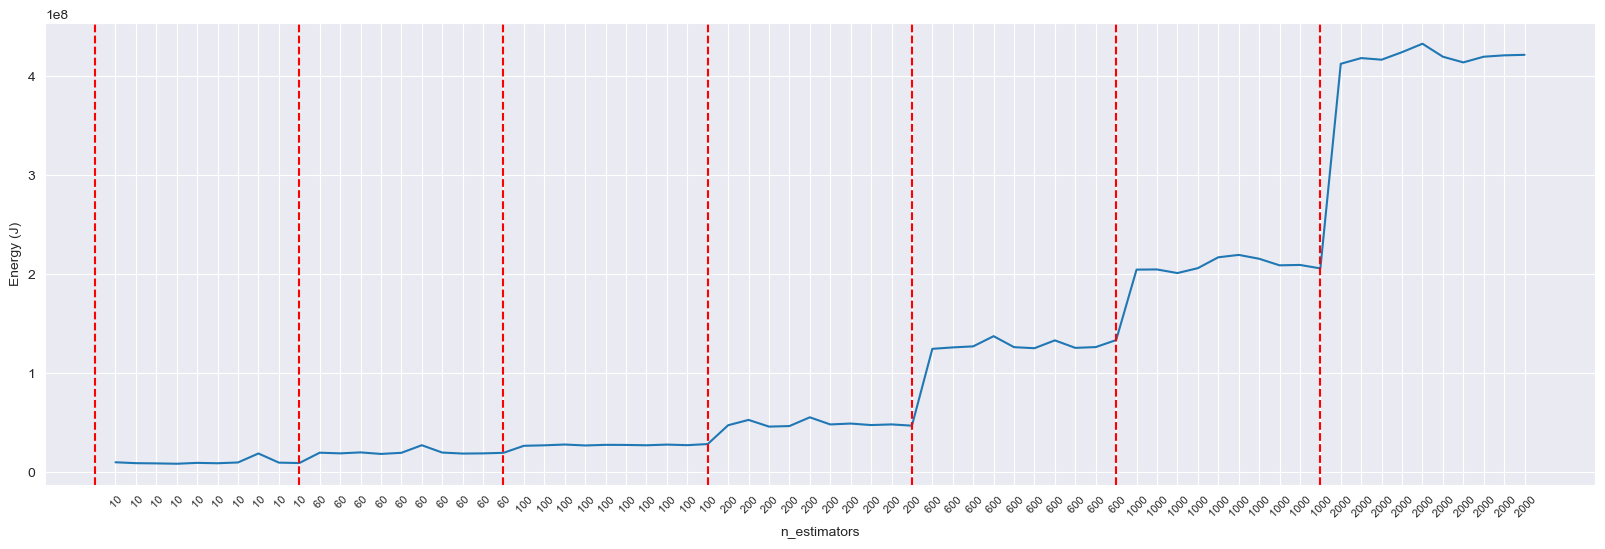

[' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25']
70


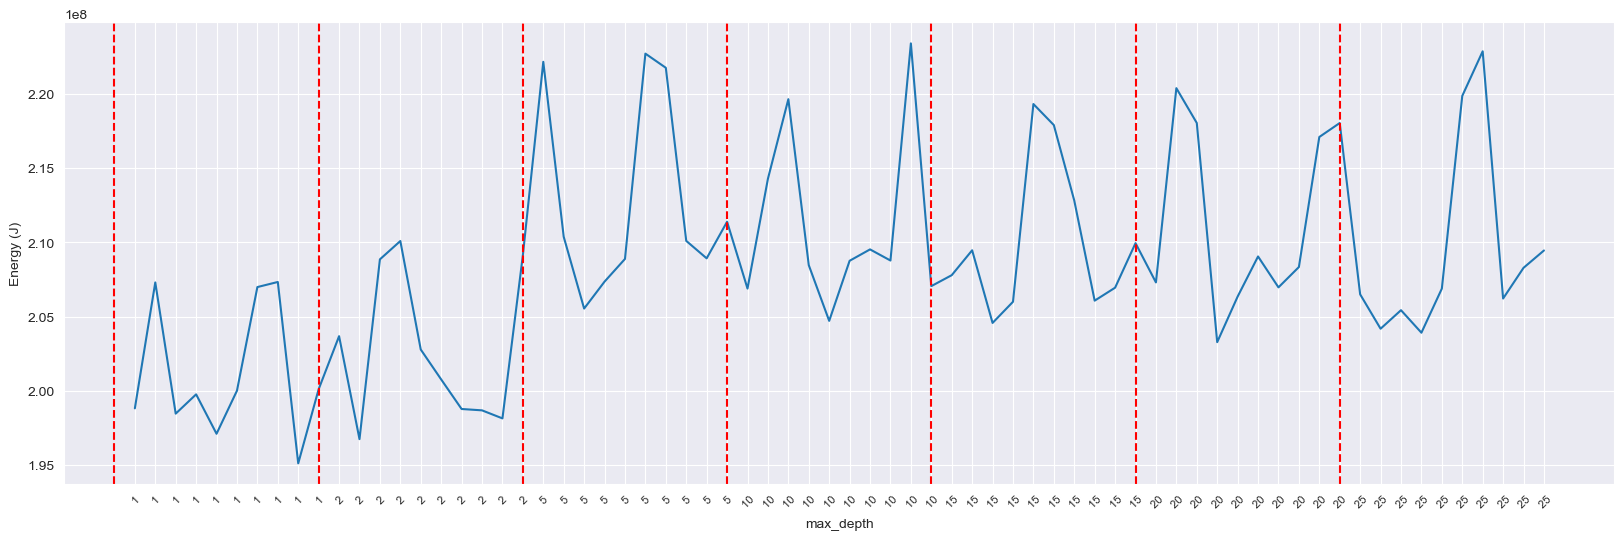

[' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10']
30


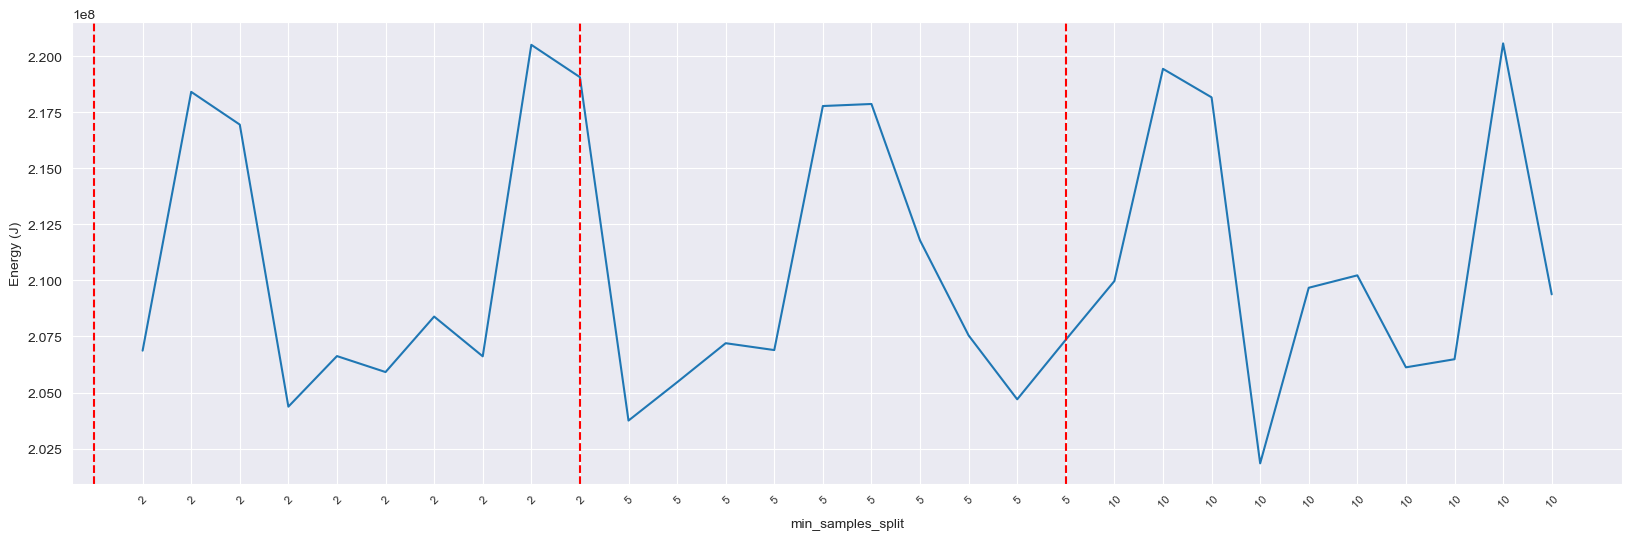

[' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50', ' 50']
80


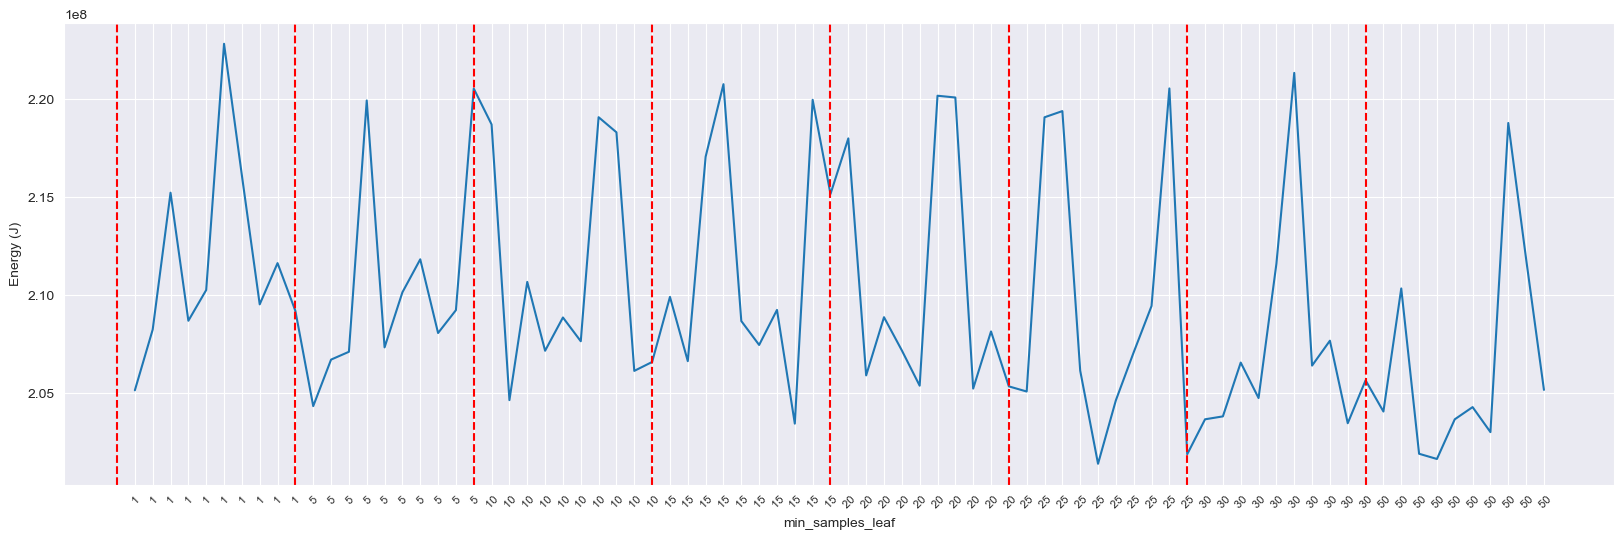

[' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0']
80


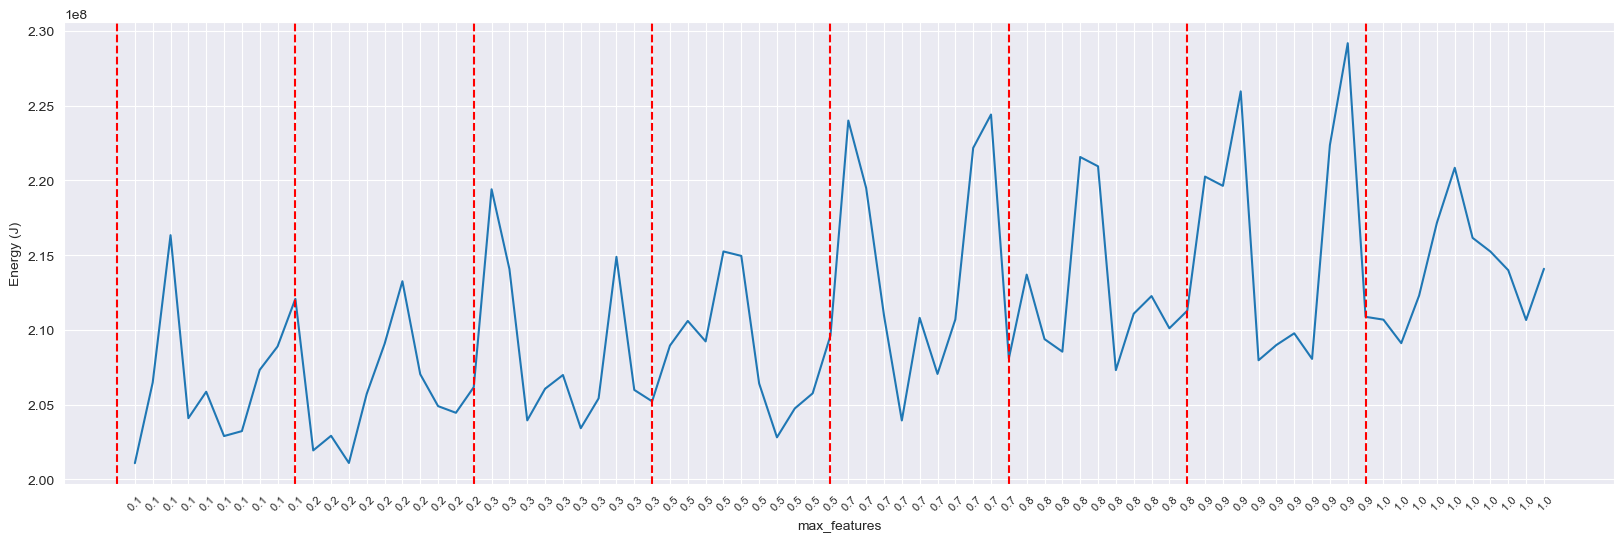

In [47]:
rf_param = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features']
plot_on_param(rf_vc, rf_param, cv_folds=10)

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/2993732614.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pp = df_cv[~(df_cv['energy'] < 0)][df_cv['tag'].str.contains(mode)]


[' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000']
68


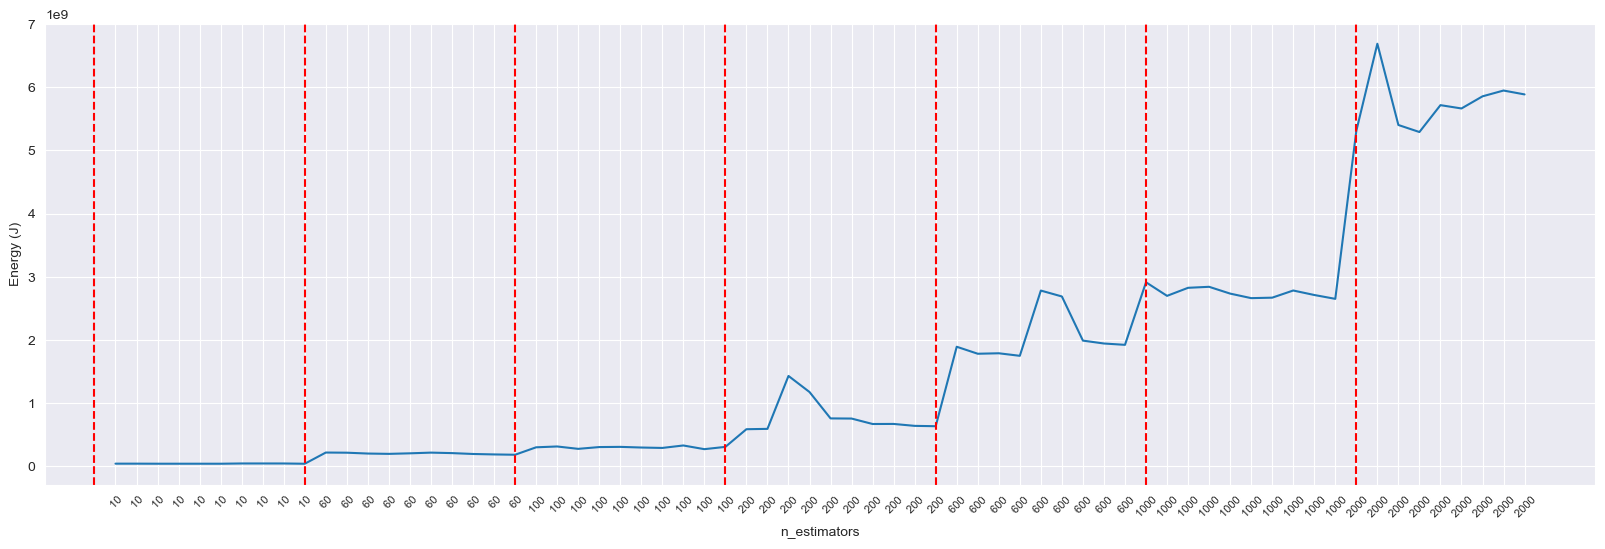

[' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30']
80


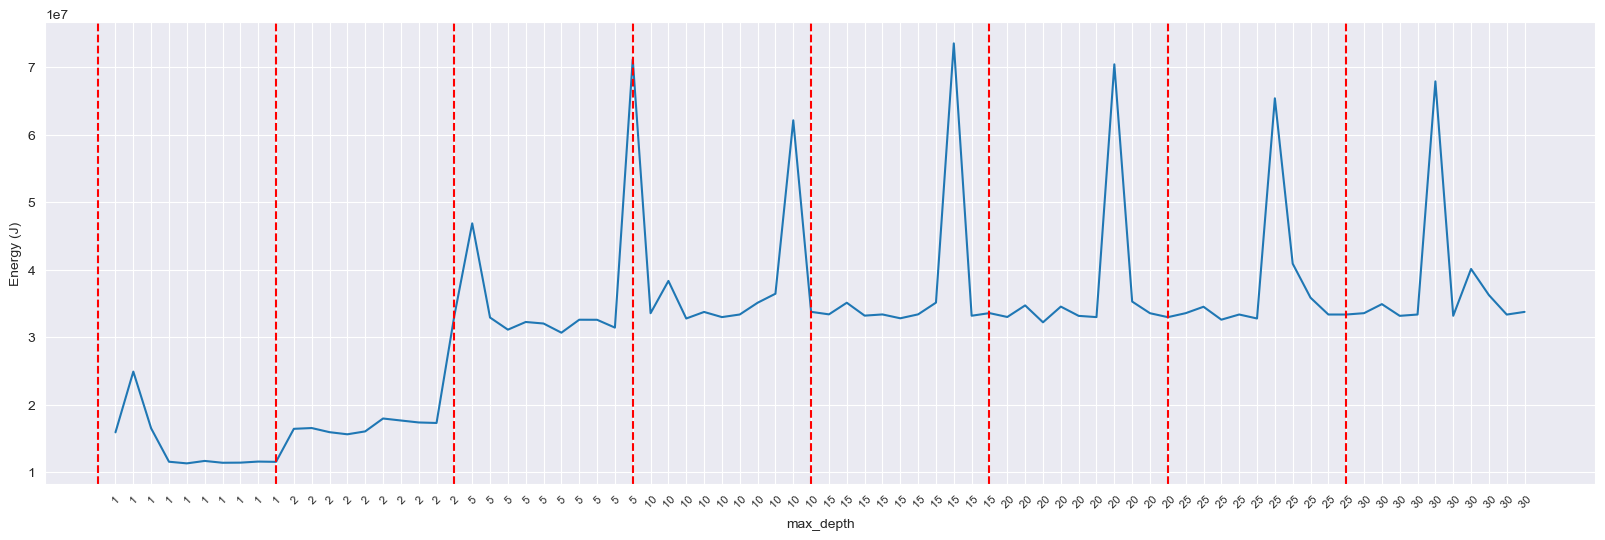

[' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9']
90


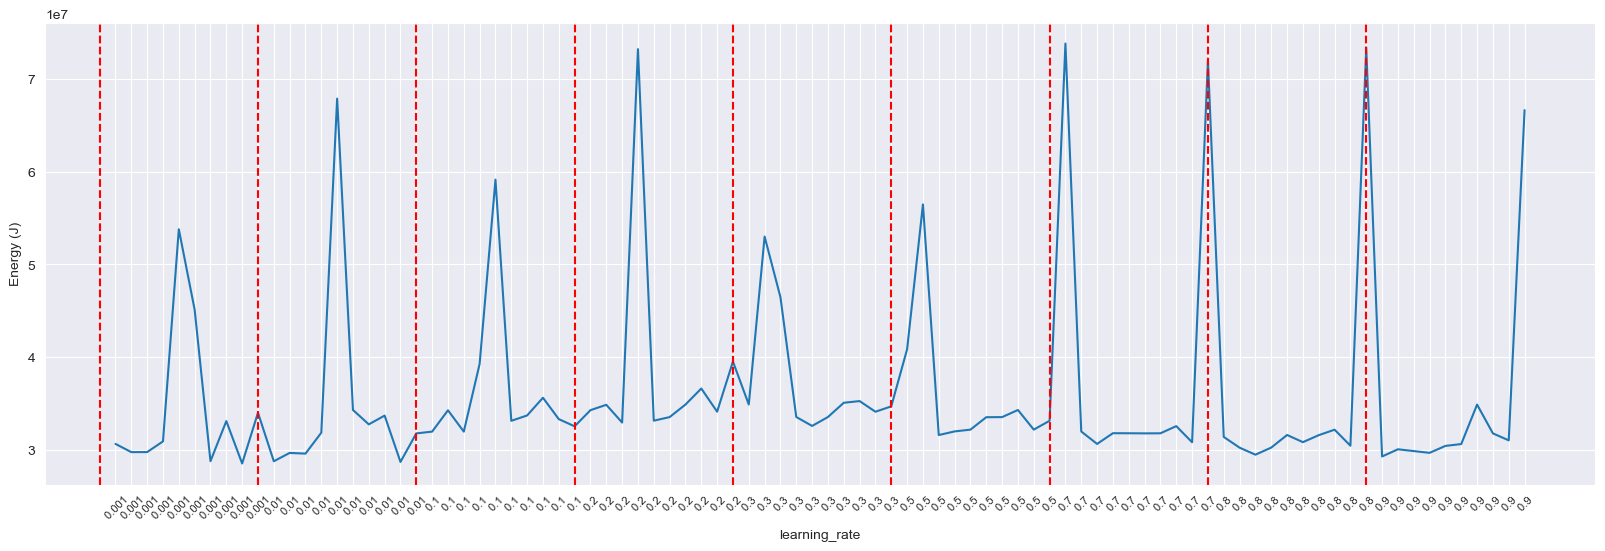

[' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0']
60


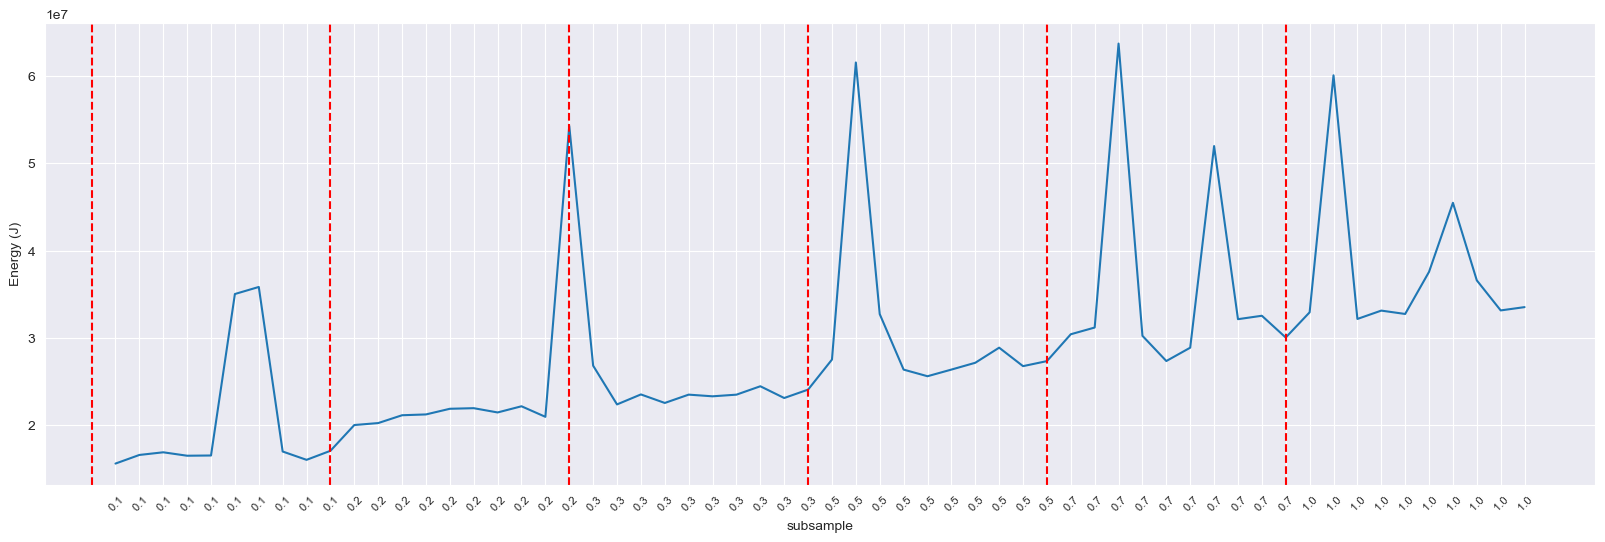

[' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 3', ' 3', ' 3', ' 3', ' 3', ' 3', ' 3', ' 3', ' 3', ' 3', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 7', ' 7', ' 7', ' 7', ' 7', ' 7', ' 7', ' 7', ' 7', ' 7', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10']
60


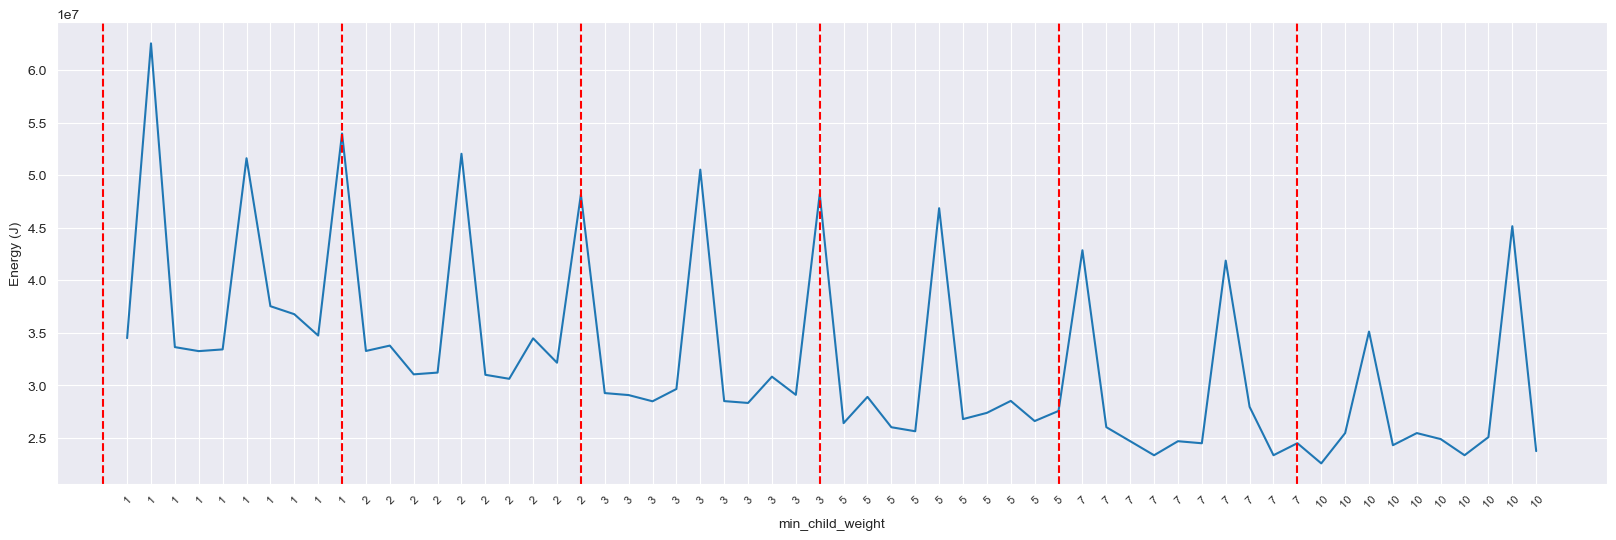

[' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0']
40


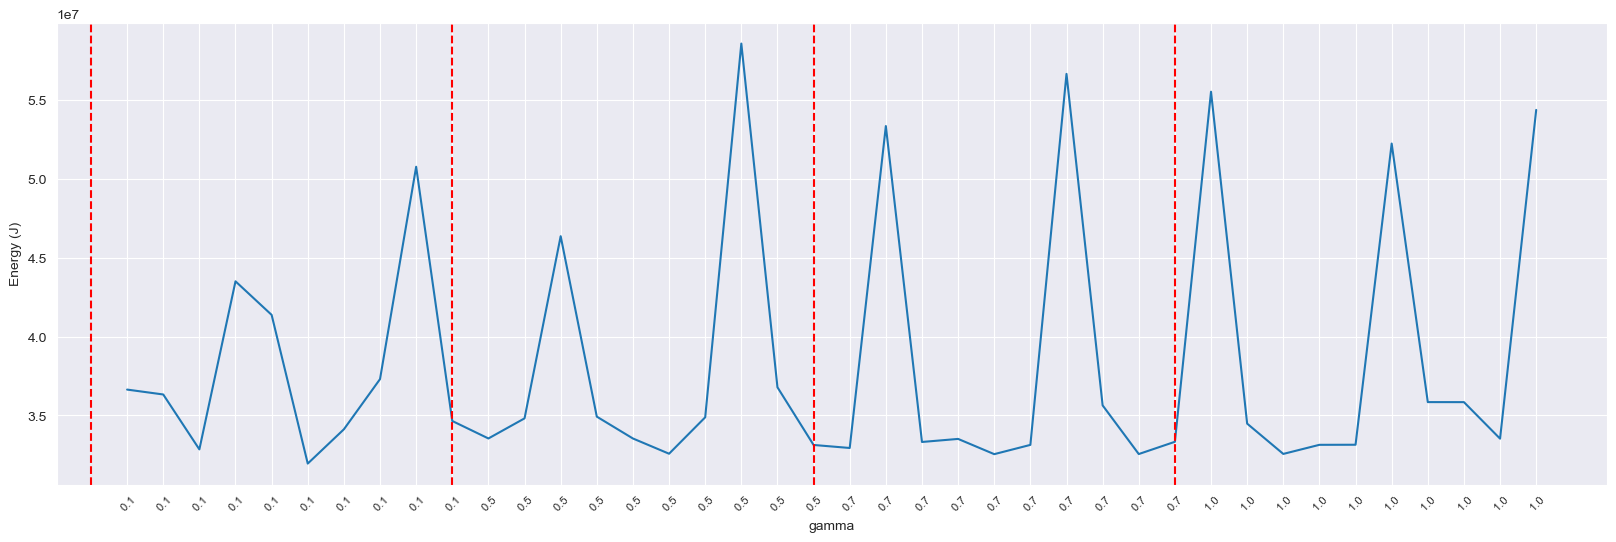

In [49]:
xgb_param = ['n_estimators', 'max_depth', 'learning_rate', 'subsample', 'min_child_weight', 'gamma']
plot_on_param(xgb_vc, xgb_param, cv_folds=10)

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/2993732614.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pp = df_cv[~(df_cv['energy'] < 0)][df_cv['tag'].str.contains(mode)]


[' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 60', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 100', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 200', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 600', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 1000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000', ' 2000']
69


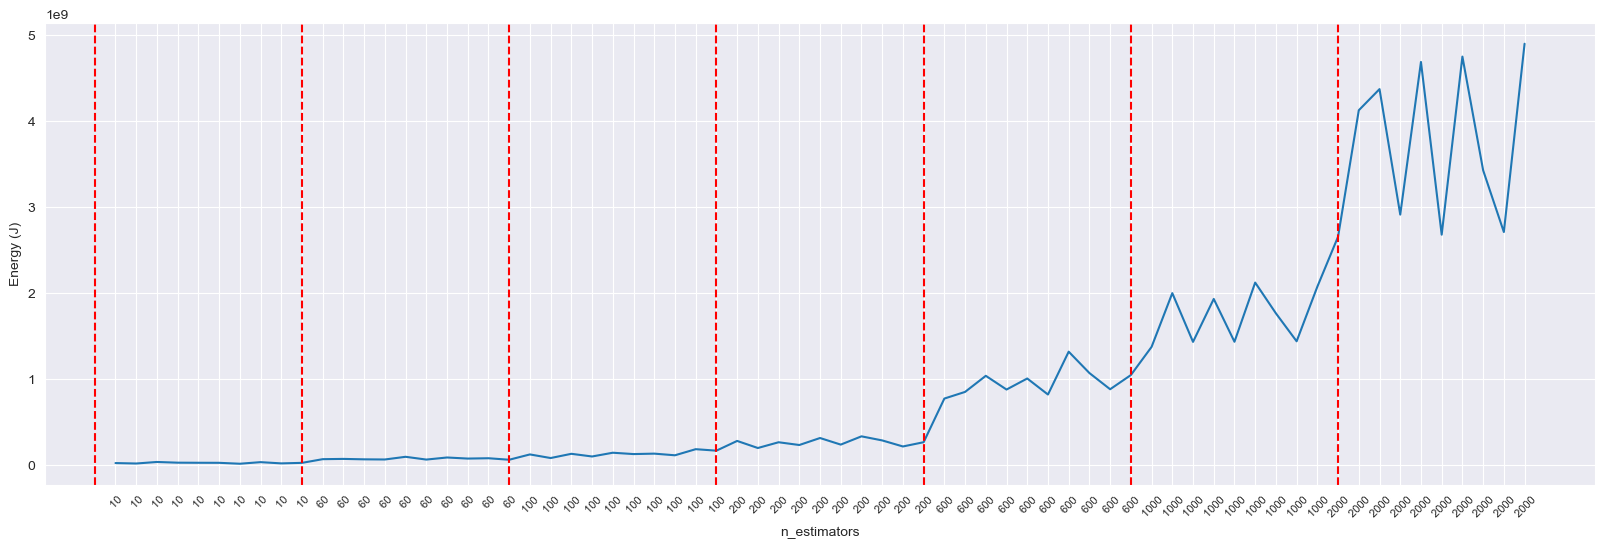

[' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 20', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 25', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30', ' 30']
79


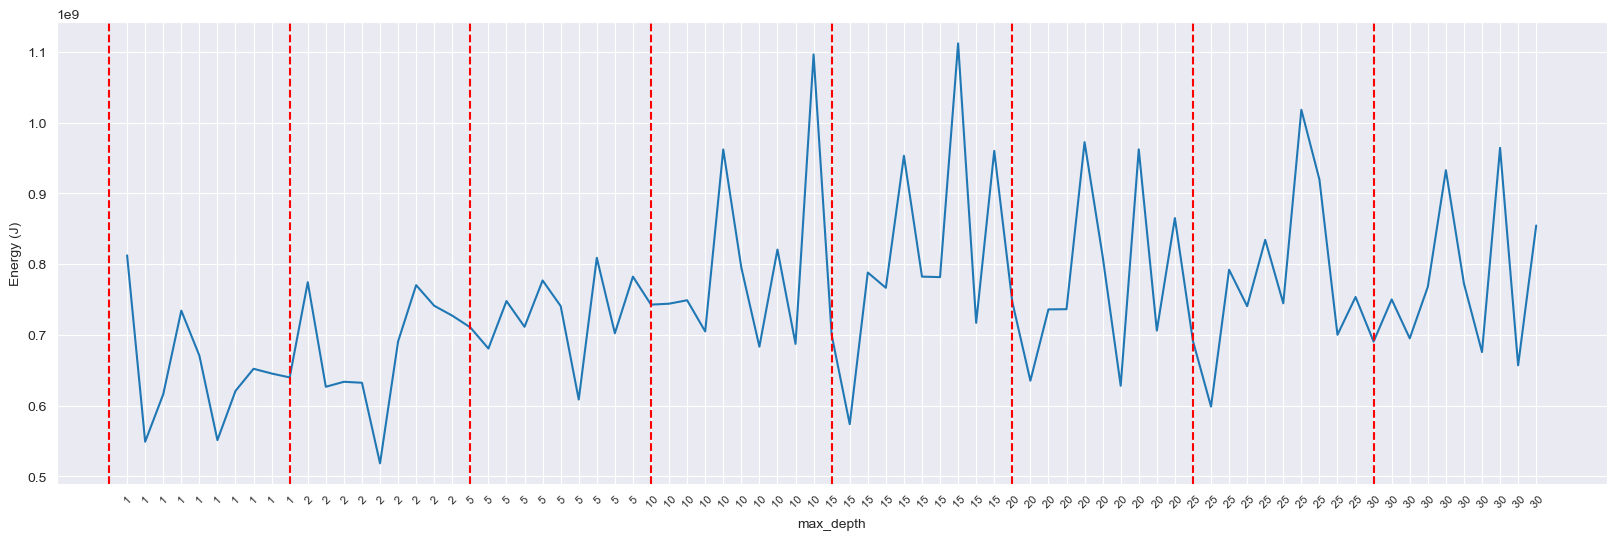

[' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.001', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.01', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.8', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9', ' 0.9']
88


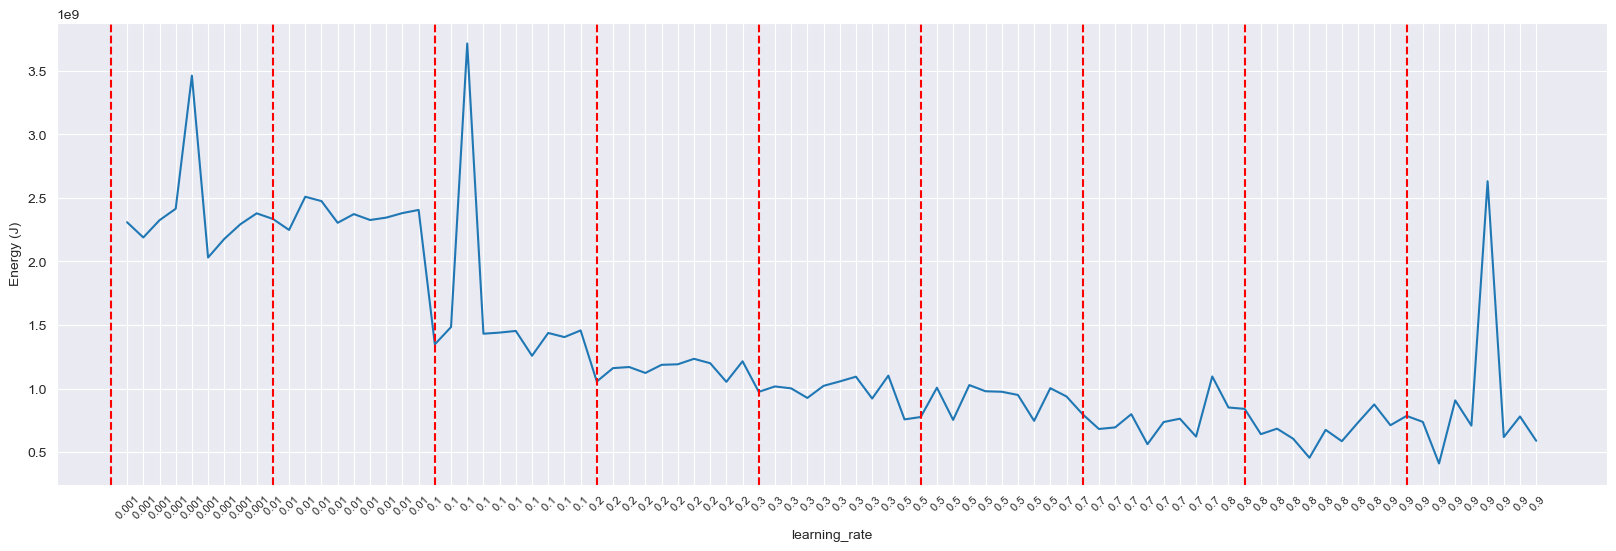

[' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.1', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.2', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.3', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.5', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 0.7', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0', ' 1.0']
59


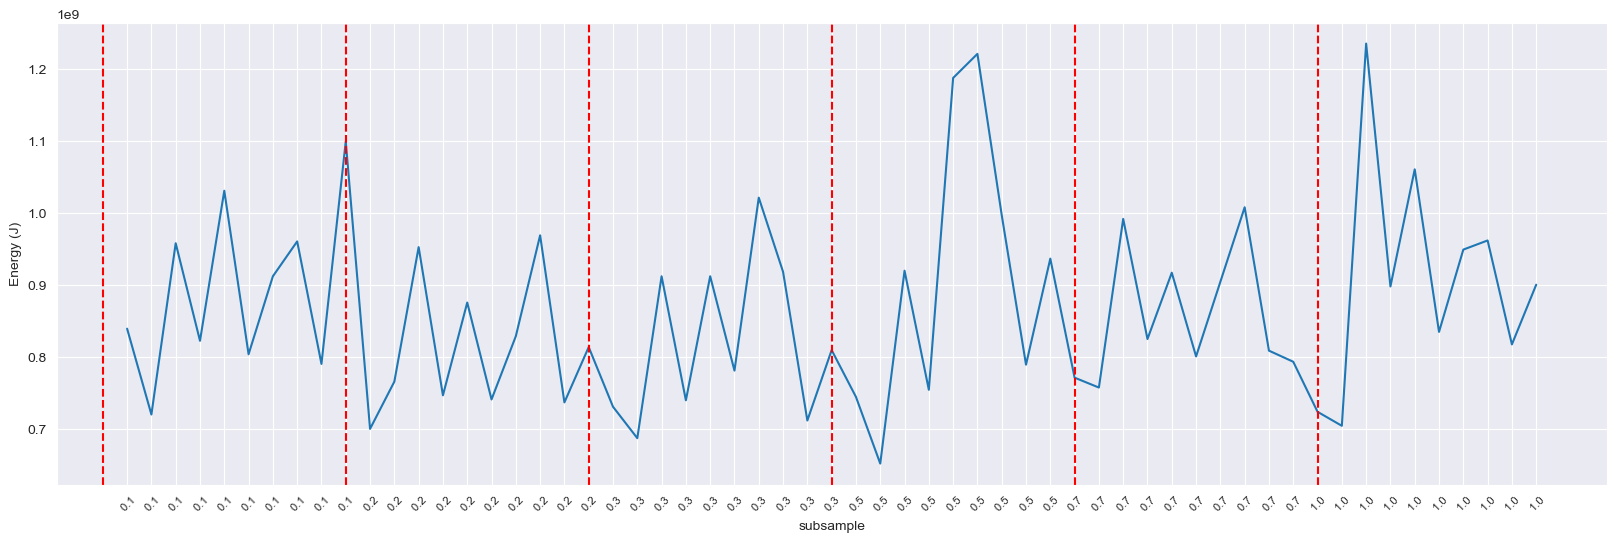

[' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 1', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 2', ' 3', ' 3', ' 3', ' 3', ' 3', ' 3', ' 3', ' 3', ' 3', ' 3', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 5', ' 7', ' 7', ' 7', ' 7', ' 7', ' 7', ' 7', ' 7', ' 7', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10', ' 10']
59


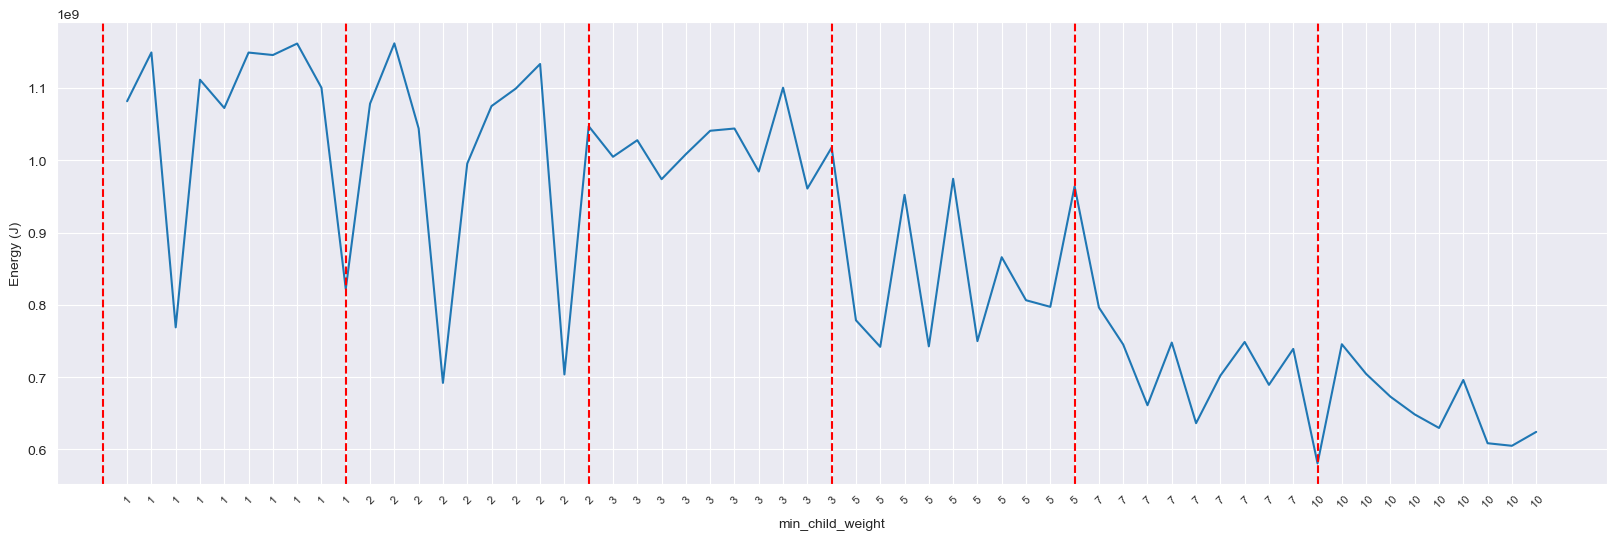

[" 'gbdt'", " 'gbdt'", " 'gbdt'", " 'gbdt'", " 'gbdt'", " 'gbdt'", " 'gbdt'", " 'gbdt'", " 'gbdt'", " 'gbdt'", " 'dart'", " 'dart'", " 'dart'", " 'dart'", " 'dart'", " 'dart'", " 'dart'", " 'dart'", " 'dart'", " 'dart'", " 'goss'", " 'goss'", " 'goss'", " 'goss'", " 'goss'", " 'goss'", " 'goss'", " 'goss'", " 'goss'", " 'goss'"]
30


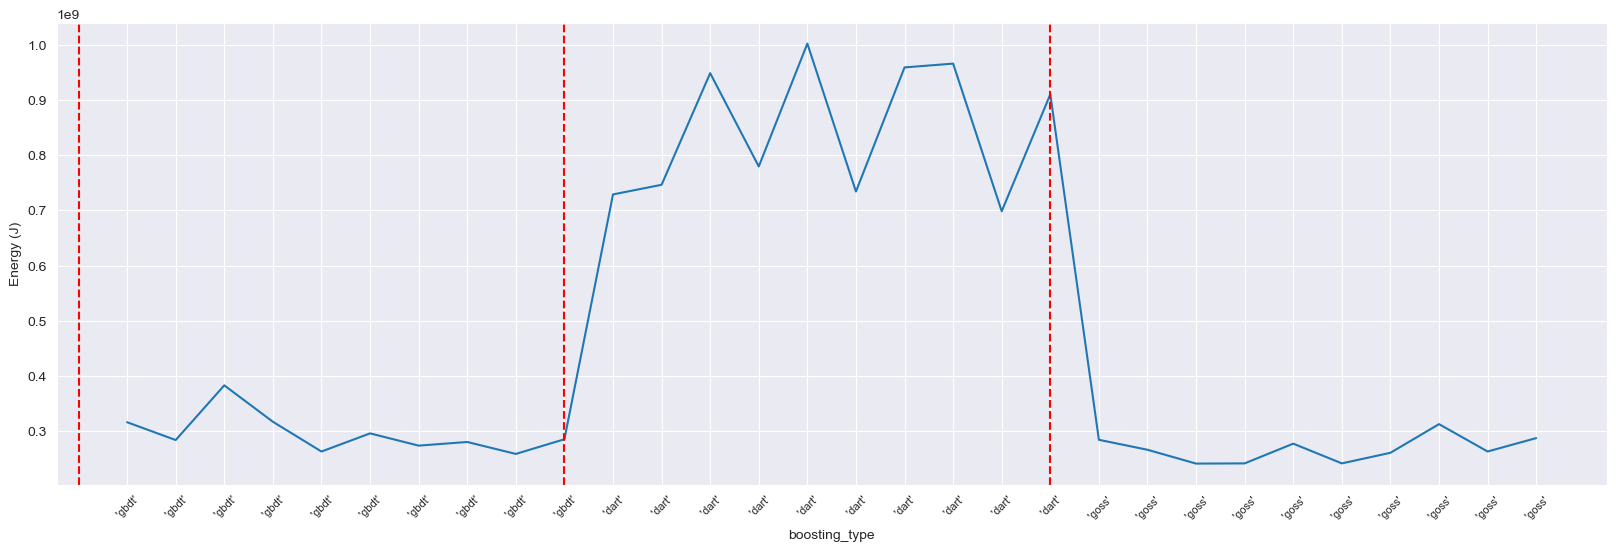

In [50]:
lgbm_param = ['n_estimators', 'max_depth', 'learning_rate', 'subsample', 'min_child_weight', 'boosting_type']
plot_on_param(lgbm_vc, lgbm_param, cv_folds=10)

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/1855995298.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pp = df_cv[~(df_cv['energy'] < 0)][df_cv['tag'].str.contains(mode)]


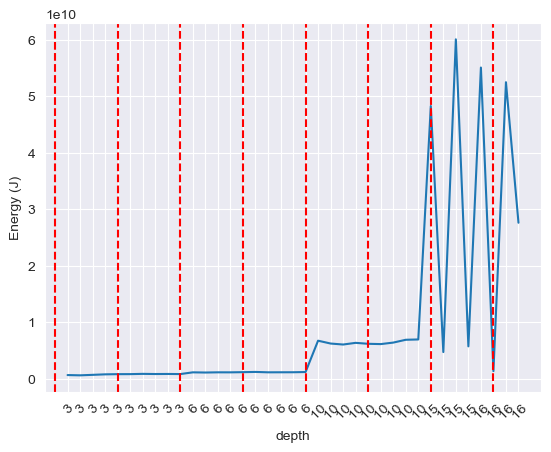

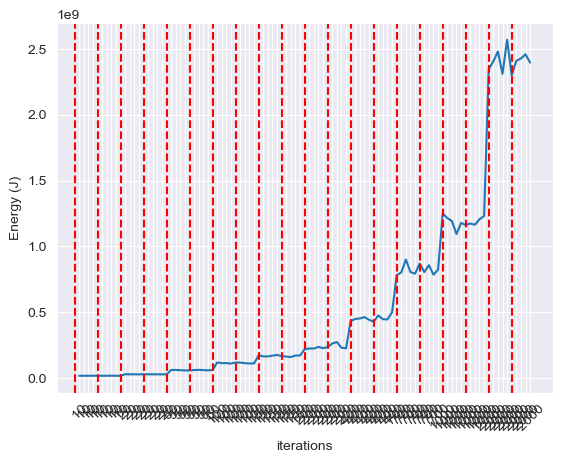

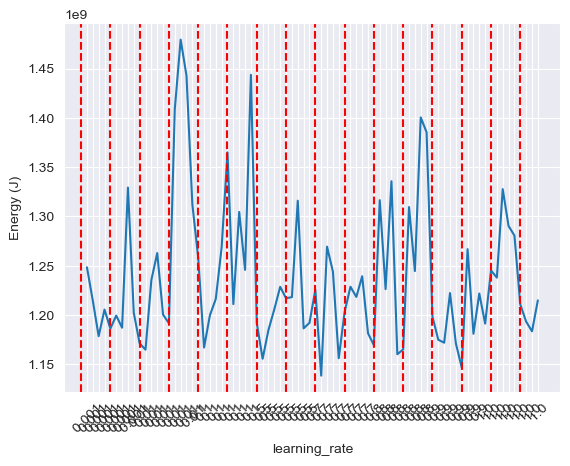

In [20]:
cat_param = ['depth', 'iterations', 'learning_rate']
plot_on_param(cat_vc, cat_param)

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/3091110904.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lgbm_vc[~(lgbm_vc['energy'] < 0)][lgbm_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_94330/3091110904.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xgb_vc[~(xgb_vc['energy'] < 0)][xgb_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()


<AxesSubplot: >

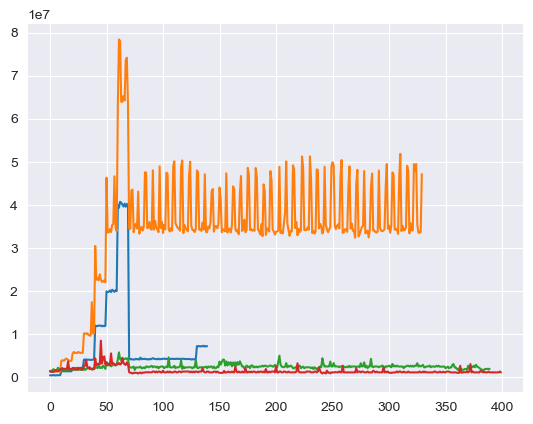

In [21]:
ada_vc[~(ada_vc['energy'] < 0)][ada_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()
rf_vc[~(rf_vc['energy'] < 0)][rf_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()
lgbm_vc[~(lgbm_vc['energy'] < 0)][lgbm_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()
xgb_vc[~(xgb_vc['energy'] < 0)][xgb_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()

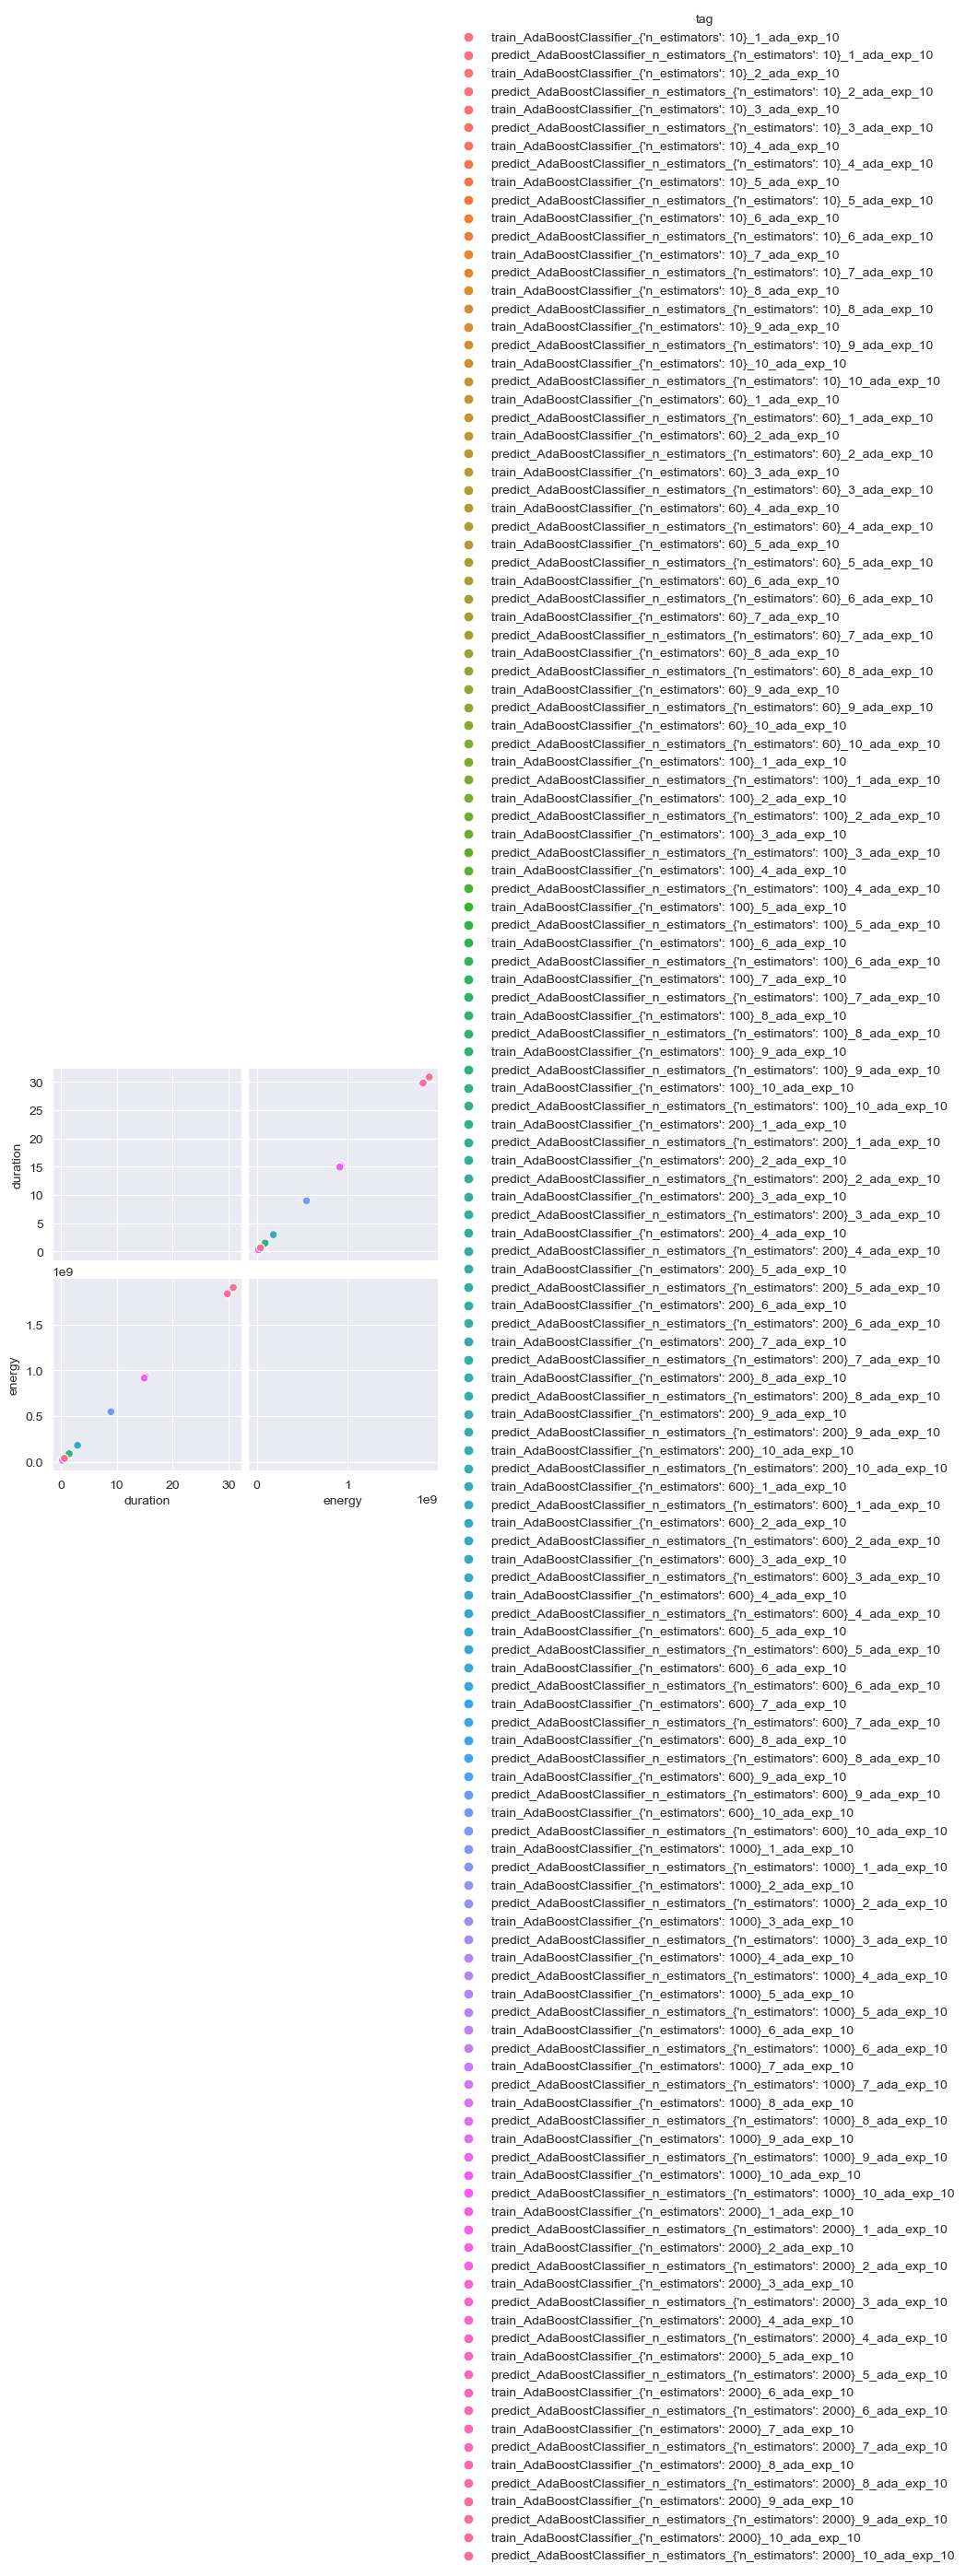

In [30]:
# ada_vc.drop(['Unnamed: 0'], inplace=True, axis=1)
sns.pairplot(ada_vc[ada_vc['tag'].str.contains('estimators')], hue="tag")

In [23]:
# plot only specific params
pp = ada_vc[ada_vc['tag'].str.contains('train')]

 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 60
 60
 60
 60
 60
 60
 60
 60
 60
 60
 100
 100
 100
 100
 100
 100
 100
 100
 100
 100
 200
 200
 200
 200
 200
 200
 200
 200
 200
 200
 600
 600
 600
 600
 600
 600
 600
 600
 600
 600
 1000
 1000
 1000
 1000
 1000
 1000
 1000
 1000
 1000
 1000
 2000
 2000
 2000
 2000
 2000
 2000
 2000
 2000
 2000
 2000
{' 60', ' 100', ' 1000', ' 200', ' 2000', ' 10', ' 600'}


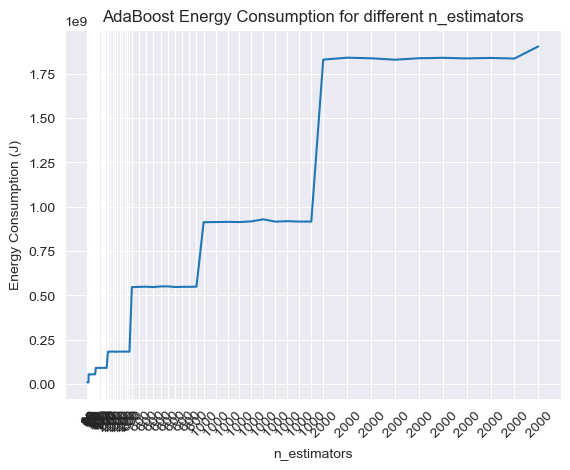

Index([' 60', ' 100', ' 1000', ' 200', ' 2000', ' 10', ' 600'], dtype='object')


<AxesSubplot: >

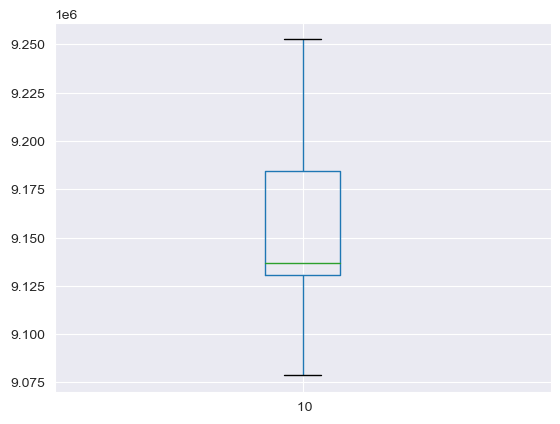

In [24]:

p_tags = []
for t in pp[pp['tag'].str.contains('n_estimators')]['tag']:
    print(t.split('_')[3].split(':')[1].split('}')[0])
    p_tags.append(t.split('_')[3].split(':')[1].split('}')[0])

print(set(p_tags))
df_param = pd.DataFrame()
for v in set(p_tags):
    df_param[str(v)] = pp[pp['tag'].str.contains(v+'}')]['energy'].reset_index()['energy']


ax = pp[pp['tag'].str.contains('n_estimators')]['energy'].plot(xticks=pp[pp['tag'].str.contains('n_estimators')].index,rot=45)
ax.set_xticklabels(p_tags)
ax.set_xlabel('n_estimators')
ax.set_ylabel('Energy Consumption (J)')
ax.set_title('AdaBoost Energy Consumption for different n_estimators')

plt.show()
print(df_param.columns)
df_param.boxplot(column=[' 10'])